# Taller 3

Felipe Palacios,  Santiago Segura, Vihlai Maldonado

## Objetivo
Evaluar las capacidades del estudiante para desarrollar modelos analíticos supervisados contemplando las etapas de la metodología ASUM-DM, como son el análisis y entendimiento de los datos, preparación de datos, creación de modelos, evaluación y análisis de resultados.
## Planteamiento del problema
Una empresa del sector farmacéutico desea utilizar la información que posee de sus empleados para estimar el nivel de satisfacción laboral que puedan tener en algún momento y usarlo como insumo para detectar posibles fugas de personal. El CEO de la farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel de satisfacción laboral de sus empleados y evitar futuras fugas de personal.
A continuación, se describe el diccionario de datos del dataset con el cual se debe conducir el análisis:


| Field                             | Description                                             |
|-----------------------------------|---------------------------------------------------------|
| Age                               | Age of the employee                                     |
| Attrition                         | employee attrition                                      |
| BusinessTravel                    | how frequently an employee travels for business purpose |
| DailyRate                         | Daily wage of an employee                               |
| Department                        | Employee department                                     |
| DistanceFromHome                  | Distance from home to office in KM's                    |
| Education                         | Qualification of employee (masked, higher is better)    |
| EducationField                    | Stream of Education                                     |
| EmployeeCount                     | EmployeeCount                                           |
| EmployeeNumber                    | employee number                                         |
| EnvironmentSatisfaction           | Environment (higher is better)                          |
| Gender                            | Gender of employee                                      |
| HourlyRate                        | employee hourly rate                                    |
| JobInvolvementAge of the employee | Job involvement (higher is better)                      |
| JobLevel                          | level of Job (higher is more important)                 |
| JobRole                           | job role of an employee                                 |
| JobSatisfaction                   | if employee is satisfied?                               |
| MaritalStatus                     | employee is married or not                              |
| MonthlyIncome                     | income of an employee                                   |
| MonthlyRate                       | monthly rate of an employee                             |
| NumCompaniesWorked                | number of companies worked for                          |
| Over18                            | age over 18                                             |
| OverTime                          | employee works over time                                |
| PercentSalaryHike                 | salary hike                                             |
| PerformanceRating                 | performance rate                                        |
| RelationshipSatisfaction          | Relationship satisfaction                               |
| StandardHours                     | per week standard work hours                            |
| StockOptionLevel                  | company stock option level                              |
| TotalWorkingYears                 | total working years                                     |
| TrainingTimesLastYears            | Training time                                           |
| WorkLifeBalance                   | Work life balance                                       |
| YearsAtCompany                    | total years at current company                          |
| YearsInCurrentRole                | total years in current role                             |
| YearsSinceLastPromotion           | years since last promotion                              |
| YearsWithCurrManag                | Years worked under current manager                      |

In [2]:
!pip -q install --upgrade pandas-profiling
!pip -q install markupsafe==2.0.1
!pip -q install shap

     |████████████████████████████████| 315 kB 15.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 102 kB 56.7 MB/s 
     |████████████████████████████████| 690 kB 55.7 MB/s 
     |████████████████████████████████| 9.9 MB 38.9 MB/s 
     |████████████████████████████████| 4.7 MB 47.7 MB/s 
     |████████████████████████████████| 296 kB 43.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.5 MB/s 


In [184]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns
import csv
%matplotlib inline
import missingno as msno


from sklearn.metrics import r2_score
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
import joblib
import shap
import joblib
import pickle

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Lectura DataFrame
A continuación se hace la primera lectura del archivo CSV.

In [233]:
data_df = pd.read_csv('https://raw.githubusercontent.com/MaldonadoVihlai/taller_cda/main/taller3/data/Data_Taller_3.csv', sep=';')
data_df.head()

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0


## Limpieza y preparación de datos
Incluya como mínimo:
* Corrección de formatos.
* Búsqueda y corrección de valores atípicos, valores faltantes y duplicados. No se deben eliminar registros.

In [234]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           1494 non-null   float64
 1   Age                       1503 non-null   float64
 2   Attrition                 1505 non-null   object 
 3   BusinessTravel            1506 non-null   object 
 4   DailyRate                 1506 non-null   int64  
 5   Department                1506 non-null   object 
 6   DistanceFromHome          1506 non-null   int64  
 7   Education                 1506 non-null   int64  
 8   EducationField            1506 non-null   object 
 9   EmployeeCount             1506 non-null   int64  
 10  EmployeeNumber            1506 non-null   int64  
 11  EnvironmentSatisfaction   1506 non-null   int64  
 12  Gender                    1506 non-null   object 
 13  HourlyRate                1506 non-null   int64  
 14  JobInvol

Encontramos que JobSatisfaction tiene 12 registros nulos, Attrtition 1 registro nulo, StandarHours 7 registros nulos.

### Corrección de formatos

In [235]:
data_df.dtypes

JobSatisfaction             float64
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel            

In [236]:
data_df['Attrition'].unique()

array(['Yes', 'No', 'Na', nan], dtype=object)

Se observa que el valor No tiene otro valor llamado Na, asignamos este valor a No

In [237]:
data_df['Attrition'] = data_df['Attrition'].replace({'Na': 'No'})

In [238]:
data_df['Attrition'].unique()

array(['Yes', 'No', nan], dtype=object)

In [239]:
data_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [240]:
data_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [241]:
data_df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13])

In [242]:
data_df['Education'].unique()

array([2, 1, 4, 3, 5, 7])

In [243]:
data_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources', 'Med'], dtype=object)

Se observa que el valor Medical y Med posiblemente signifiquen lo mismo, por lo que se dejará un sólo valor

In [244]:
data_df['EducationField'] = data_df['EducationField'].replace({'Med': 'Medical'})

In [245]:
data_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [246]:
data_df['Gender'].unique()

array(['Fem', 'Male', 'man', 'Female', 'female'], dtype=object)

Se observa que la variable `Gender` tiene registros diferentes para un mismo atributo, se corrigen estos valores

In [247]:
data_df['Gender'] = data_df['Gender'].replace({'Fem': 'Female', 'man': 'Male', 'female': 'Female'})

In [248]:
data_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [249]:
data_df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources',
       'Lab Tech', 'RH'], dtype=object)

Observamos valores duplicados para la variable `JobRole` como 'Human Resources', y 'RH', y 'Laboratory Technician' y 'Lab Tech' se corrigen estos valores

In [250]:
data_df['JobRole'] = data_df['JobRole'].replace({'RH': 'Human Resources', 'Lab Tech': 'Laboratory Technician'})

In [251]:
data_df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [252]:
data_df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced', 'S', 'D', 'M'], dtype=object)

Observamos valores duplicados para el mismo atributo, se corrigen estos valores

In [253]:
data_df['MaritalStatus'] = data_df['MaritalStatus'].replace({'S': 'Single', 'D': 'Divorced', 'M': 'Married'})

In [254]:
data_df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [255]:
data_df['Over18'].unique()

array(['Y'], dtype=object)

In [256]:
data_df['OverTime'].unique()

array(['Yes', 'No', 'Na'], dtype=object)

Se observa que el valor No tiene otro valor llamado Na, asignamos este valor a No

In [257]:
data_df['OverTime'] = data_df['OverTime'].replace({'Na': 'No'})

In [258]:
data_df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

### Registros duplicados

In [259]:
data_df[data_df.duplicated(keep=False)]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee



Se observa que el dataset no contiene registros duplicados.

### Valores nulos


In [260]:
null_data_df = data_df[data_df.isnull().any(axis=1)]
null_data_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,80.0,1,10,1,3,10,9,8,8,1
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,...,80.0,1,2,0,2,1,0,0,0,1
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,...,80.0,0,16,2,2,15,11,5,11,1
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,80.0,2,10,2,3,0,0,0,0,1
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,...,80.0,1,10,3,2,9,8,7,8,1
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,80.0,1,4,2,3,3,2,2,2,1


Observamos varias columnas que tienen valores nulos, por temas de limitación en los datos se realizará la imputación sin eliminar los registros.

In [261]:
data_df[data_df['JobSatisfaction'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,80.0,1,10,1,3,10,9,8,8,1
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,...,80.0,1,2,0,2,1,0,0,0,1
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,...,80.0,0,16,2,2,15,11,5,11,1
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,80.0,2,10,2,3,0,0,0,0,1
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,...,80.0,1,10,3,2,9,8,7,8,1
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,80.0,1,4,2,3,3,2,2,2,1
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,1,...,80.0,1,10,3,3,10,3,1,4,1
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,80.0,0,20,6,3,1,0,0,0,1
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,...,80.0,1,26,5,3,22,9,3,10,1
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,...,80.0,0,8,2,4,5,4,1,2,1


La columna JobSatisfaction tiene valores faltantes, estos registros se moverán a un nuevo set de datos para evaluar la satisfacción del empleado cuando se tenga el modelo y se eliminan del set de datos. Este proceso se realizará después del preprocesamiento de los datos para el entrenamiento del modelo, con el fin de que los datos de validación presenten la misma estructura de los datos de entrenamiento.

In [262]:
data_df[data_df['Age'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,80.0,3,5,2,3,5,4,0,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1,...,80.0,1,10,4,3,10,9,1,7,0


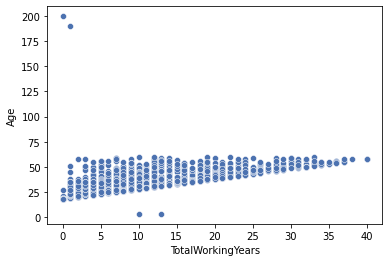

In [263]:
sns.scatterplot(data=data_df, x= 'TotalWorkingYears', y='Age')

Se puede observar que hay valores de edad demasiado grandes como por ejemplo los mayores a 175 años, y otros que son menores a 10 años.

In [264]:
data_df[data_df['Age']> 175]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
149,2.0,190.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,80.0,0,1,3,3,1,0,0,0,0
1485,4.0,200.0,No,Travel_Rarely,391,Research & Development,16,2,Life Sciences,1,...,80.0,0,0,6,3,0,0,0,0,0


In [265]:
data_df[data_df['Age']< 10]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
511,2.0,3.0,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,...,80.0,1,13,2,3,3,2,0,2,0
958,4.0,3.0,No,Travel_Rarely,943,Research & Development,9,3,Life Sciences,1,...,80.0,1,10,0,2,9,7,1,6,0


Se concluye que para los valores muy grande se imputaron mal los datos y se agregó un cero demás. Para los valroes muy pequeños, se concluye que faló agregarles un cero. Por ende, se dividen en 10 los valores grandes y se multiplican por 10 los valores pequeños.

In [266]:
data_df.loc[data_df['Age']> 175,'Age'] = data_df.loc[data_df['Age']> 175,'Age']/10

In [267]:
data_df.loc[data_df['Age']< 10,'Age'] = data_df.loc[data_df['Age']< 10,'Age']*10

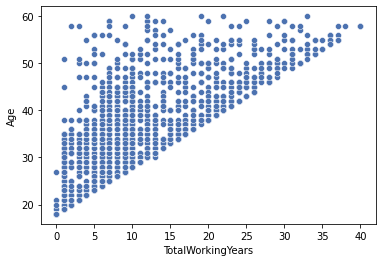

In [268]:
sns.scatterplot(data=data_df, x= 'TotalWorkingYears', y='Age')

Observamos una medianamente fuerte correlación lineal con la variable TotalWorkingYears, razón por la cual usaremos esta variable para predecir los valores faltantes de la variable Age. Para realizar esta imputación, se creará un modelo de regresión lineal simple entre la variable TotalWorkingYears y Age, se entrenará con los valores no nulos y se predecirán los valores nulos:

In [269]:
#Modelo de regresión lineal
lin_reg_temp = LinearRegression()
lin_reg_temp.fit(data_df[~data_df.isnull().any(axis=1)]['TotalWorkingYears'].values.reshape(-1,1), data_df[~data_df.isnull().any(axis=1)]['Age'].values.reshape(-1,1))
data_df[data_df['Age'].isnull()]['TotalWorkingYears']

4        6
977      5
1340    10
Name: TotalWorkingYears, dtype: int64

In [270]:
#Predicción de los valores nulos
lin_reg_temp.predict(data_df[data_df['Age'].isnull()]['TotalWorkingYears'].values.reshape(-1,1))

array([[32.71126152],
       [31.91506647],
       [35.89604173]])

In [271]:
data_df[data_df['Age'].isnull()]['TotalWorkingYears'].values

array([ 6,  5, 10])

In [272]:
#Asignación de la predicción a los valores nulos:
data_df.at[4, 'Age'] = 33
data_df.at[977, 'Age'] = 32
data_df.at[1340, 'Age'] = 36

In [273]:
data_df[data_df['Attrition'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Medical,1,...,80.0,1,1,3,3,1,0,0,0,0


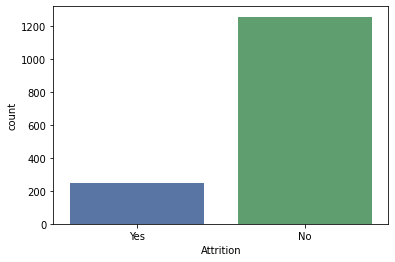

In [274]:
sns.countplot(data=data_df, x='Attrition')

Observamos que la moda de la variable Attrition es No, por lo que imputamos este valor al registro que tiene un nulo

In [275]:
data_df.loc[data_df['Attrition'].isnull(), 'Attrition'] = 'No'

In [276]:
data_df[data_df['StandardHours'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
992,3.0,39.0,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,...,NaN,1,13,2,3,6,4,0,5,0
1112,2.0,38.0,Yes,Travel_Rarely,903,Research & Development,2,3,Medical,1,...,NaN,2,7,2,3,5,2,1,4,0
1291,1.0,37.0,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,...,NaN,0,10,4,1,10,3,0,8,0
1377,4.0,49.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,NaN,0,28,3,3,5,4,4,3,0


Observamos que la variable StandardHours tiene valores faltantes para empleados que pertenencen a los departamentos de Research & Development	 y Sales. Para realizar la imputación tomaremos en cuenta si el empleado incurre en tiempo extra (OverTime) y le asignaremos la media a estos valores

In [277]:
#Empleados del departamento de Research & Development con OverTime
mean_standardhours = data_df[(~data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Research & Development') & (data_df['OverTime'] == 'Yes')]['StandardHours'].mean()
data_df.loc[(data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Research & Development') & (data_df['OverTime'] == 'Yes'), 'StandardHours'] = mean_standardhours
#Empleados del departamento de Research & Development sin OverTime
mean_standardhours = data_df[(~data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Research & Development') & (data_df['OverTime'] == 'No')]['StandardHours'].mean()
data_df.loc[(data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Research & Development') & (data_df['OverTime'] == 'No'), 'StandardHours'] = mean_standardhours

In [278]:
#Empleados del departamento de Sales sin OverTime
mean_standardhours = data_df[(~data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Sales') & (data_df['OverTime'] == 'No')]['StandardHours'].mean()
data_df.loc[(data_df['StandardHours'].isnull()) & (data_df['Department'] == 'Sales') & (data_df['OverTime'] == 'No'), 'StandardHours'] = mean_standardhours

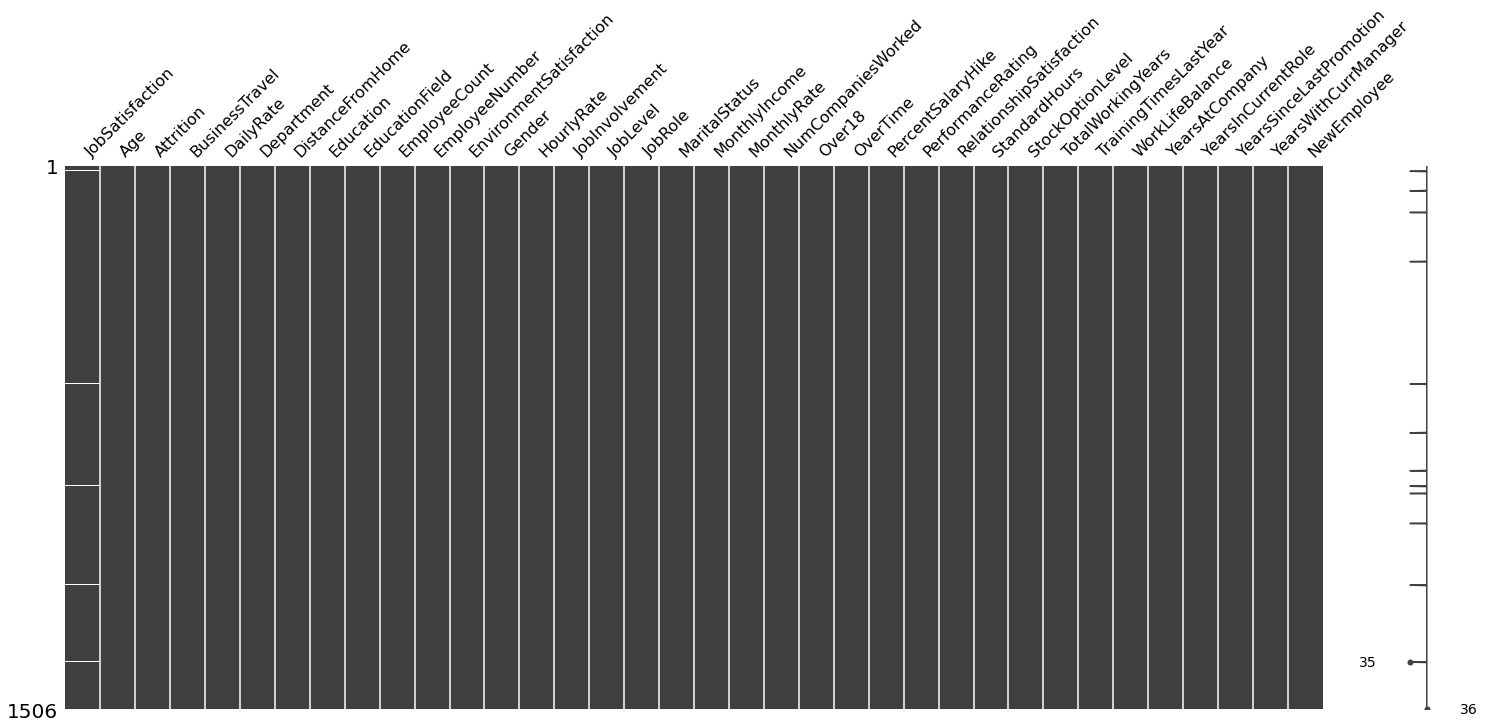

In [279]:
msno.matrix(data_df)

In [280]:
#conteo de nulos
data_df[data_df.isnull().any(axis=1)].sum()

JobSatisfaction                                                           0.0
Age                                                                     457.0
Attrition                                           NoYesNoNoNoNoNoNoNoNoNoNo
BusinessTravel              Travel_RarelyTravel_RarelyTravel_RarelyTravel_...
DailyRate                                                                9897
Department                  Research & DevelopmentResearch & DevelopmentRe...
DistanceFromHome                                                          152
Education                                                                  38
EducationField              Life SciencesMedicalMedicalMedicalLife Science...
EmployeeCount                                                              12
EmployeeNumber                                                           7996
EnvironmentSatisfaction                                                    29
Gender                      FemaleMaleFemaleMaleMaleFemaleMaleFe

De esta manera no contamos con más valores nulos en el conjunto de datos.

Con respecto a los **valores atípicos**, estos se tratarán en la siguiente sección de **Análisis de datos**.

## Análisis exploratorio de datos y selección de features
Debe consistir de lo siguiente:
* Análisis univariado de cada una de las columnas del dataset.
* Análisis bivariado de las relaciones más importantes.
* Utilice visualizaciones siempre que sea posible.
* Selección de las features más relevantes.

In [281]:
def plot_count_plot_percentages(data_df, column):
  ax = sns.countplot(data=data_df, x=column, color="teal")
  ax.set(title = 'Distribución de la variable ' + column)
  total = float(len(data_df[column]))
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()
def plot_hist_box(data_df, column):
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(data_df[column], color="gold", ax=axs[0]).set(title='Histograma de ' + column)
  sns.boxplot(data=data_df, x=column, ax=axs[1]).set(title='Box Plot de ' + column)

Variable `JobSatisfaction`

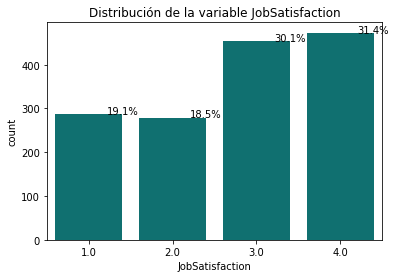

In [282]:
plot_count_plot_percentages(data_df,'JobSatisfaction')

La variable `JobSatisfaction` toma valores discretos de 1 a 4. Si asumimos que la satisfacción es incremental, observamos que el 61.5% de los empleados tienen una satisfacción entre 3 y 4 y el 37.6% entre 1 y 2. Asimismo 19.1% de los empleados no está satisfecho.

Variable `Age`

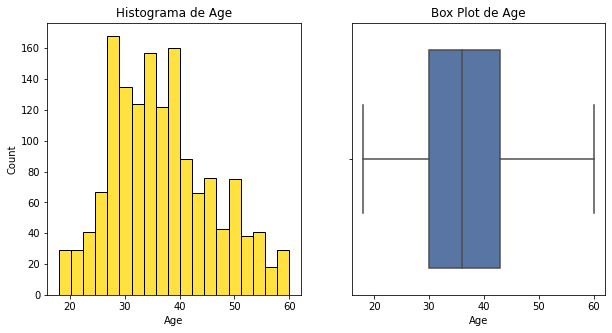

In [283]:
plot_hist_box(data_df, 'Age')

In [284]:
data_df['Age'].describe()

count    1506.000000
mean       36.882470
std         9.121556
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

La media de edad de los empleados es de aproximadamente 37 años, la edad menor es de 18 y la máxima es 60 años. 

Variable `Attrition`

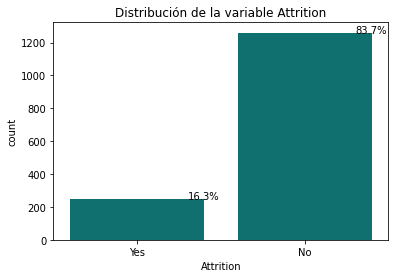

In [285]:
plot_count_plot_percentages(data_df,'Attrition')

Esta variable toma 2 categorías distintas, tenemos a 'No' con el 84% y 'Yes' con el 16.3%

Variable `BusinessTravel`

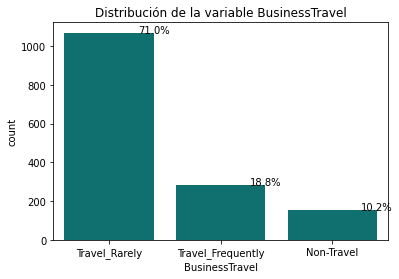

In [286]:
plot_count_plot_percentages(data_df, 'BusinessTravel')

Esta variable toma 3 categorías distintas. Tenemos a Travel_Rarely con el 71% y Non-Travel con el 10.2%. Sólo el 18.8% de los empleados viajan frecuentemente por temas de negocio

Variable `DailyRate`

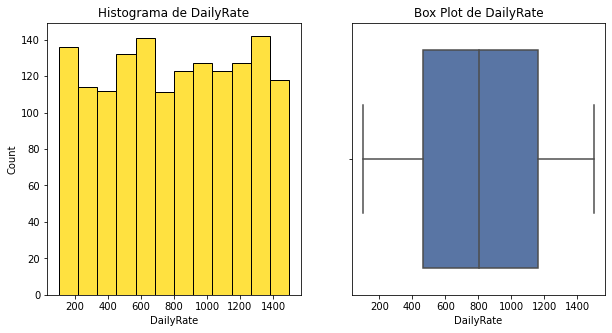

In [287]:
plot_hist_box(data_df, 'DailyRate')

In [288]:
data_df['DailyRate'].describe()

count    1506.000000
mean      803.978752
std       403.962331
min       102.000000
25%       465.000000
50%       805.000000
75%      1161.000000
max      1499.000000
Name: DailyRate, dtype: float64

Esta variable representa el salario diario de un empleado. Se distribuye entre 102 y 1499, la media es de 803.97. Asimismo, de acuerdo al diagrama de cajas no se observan valores atípicos.

Variable `Department`

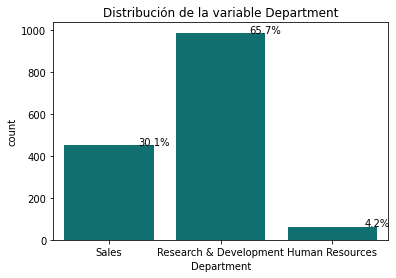

In [289]:
plot_count_plot_percentages(data_df, 'Department')

Esta variable cuenta con 3 categorías, Research & Development constituye el 66.7% de los empleados y Human Resources sólo el 4.2%.

Variable `DistanceFromHome`

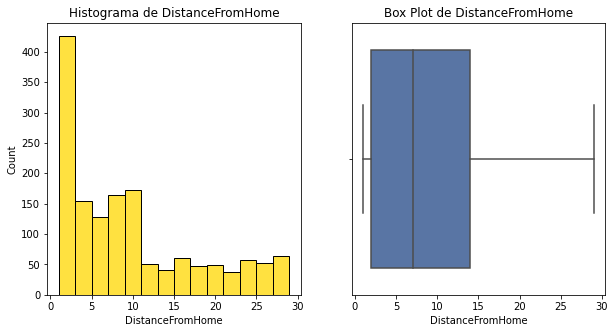

In [290]:
plot_hist_box(data_df, 'DistanceFromHome')

In [291]:
data_df['DistanceFromHome'].describe()

count    1506.000000
mean        9.229084
std         8.135153
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

El 50% de los empleados vive a menos de 7Km del trabajo y el que vive más lejos está a 29 km. La distribución tiene sesgo positivo.

Variable `Education`

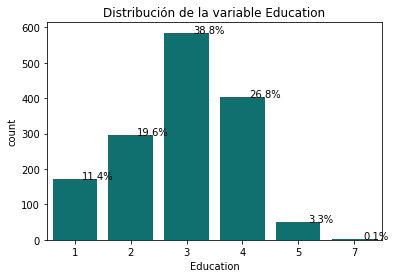

In [292]:
plot_count_plot_percentages(data_df, 'Education')

El 38.8% de los empleados cuenta con un grado 3 de educación y sólo el 0.1% con un grado 7.

Variabel `EducationField`

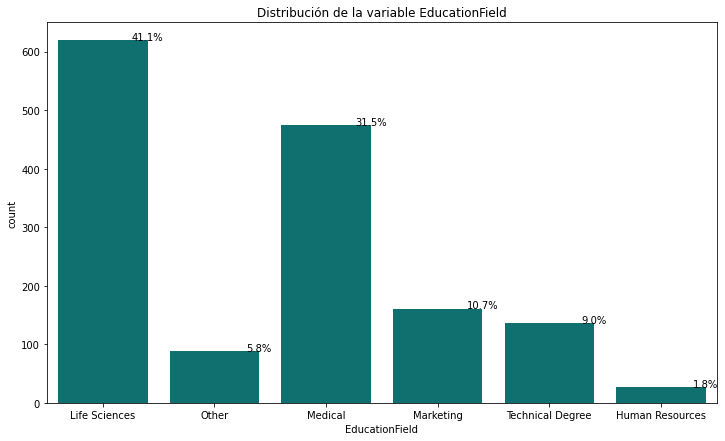

In [293]:
fig, ax = plt.subplots(figsize=(12, 7))
plot_count_plot_percentages(data_df, 'EducationField')

El 41.1% de los empleados cuenta con estudios en Life Sciences, el 31.5% en estudios Medical y el de menor cantidad, Human Resources con 1.8%.

Variable `EmployeeCount`

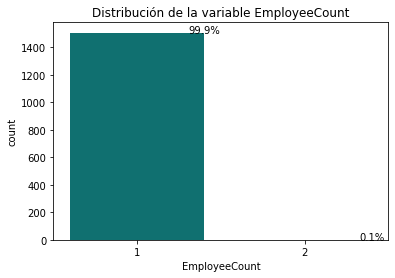

In [294]:
plot_count_plot_percentages(data_df, 'EmployeeCount')

La variable toma valores entre 1 y 2. El 99.9% de los empleados tiene valor en 1.

Variable `EmployeeNumber`

In [295]:
data_df['EmployeeNumber'].describe()

count    1506.000000
mean      753.500000
std       434.889066
min         1.000000
25%       377.250000
50%       753.500000
75%      1129.750000
max      1506.000000
Name: EmployeeNumber, dtype: float64

In [296]:
data_df[data_df['EmployeeNumber'].duplicated()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee


Se concluye que este puede ser como una variable identificadora del empleado. No se encontraron duplicados. Esta variable no se tendra en cuenta para el modelo.

Variable `EnvironmentSatisfaction`

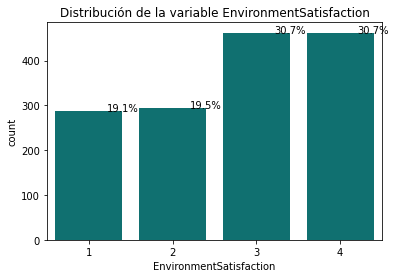

In [297]:
plot_count_plot_percentages(data_df, 'EnvironmentSatisfaction')

Esta variable cuenta con 4 valores distintos, de acuerdo al diccionario de datos
 encontramos que más alto es mejor. Tenemos que el 61.4% de los empleados dió una calificación de 3 o 4 en EnvironmentSatisfaction, calificación positiva. En cambio el 39.2% de los empleados dieron una calificación baja, de 1 o 2.

Variable `Gender`

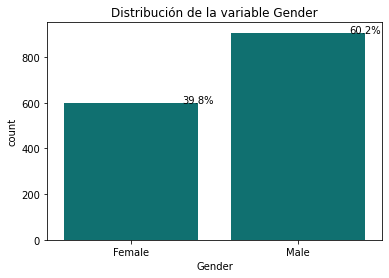

In [298]:
plot_count_plot_percentages(data_df, 'Gender')

El porcentaje de hombres en la empresa es del 60.2%.

Variable `HourlyRate`

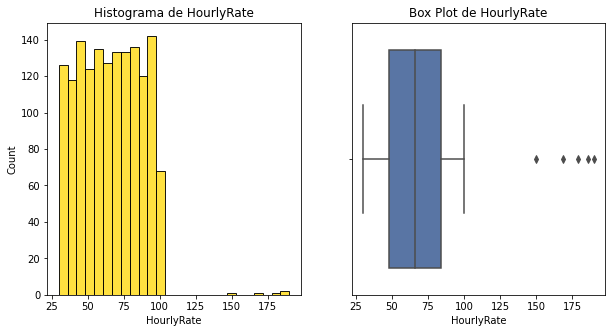

In [299]:
plot_hist_box(data_df, 'HourlyRate')

In [300]:
data_df['HourlyRate'].describe()

count    1506.000000
mean       66.280212
std        21.275971
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       190.000000
Name: HourlyRate, dtype: float64

In [301]:
data_df[data_df['HourlyRate']>125][['HourlyRate','DailyRate','MonthlyRate']]

,HourlyRate,DailyRate,MonthlyRate
264,179,529,14935
457,169,1306,8059
793,150,895,22482
1023,190,1255,10494
1416,186,1321,7636


Una de las propuestas para imputar estos valores es encontrar alguna relacion con otra de las variables, como  por ejemplo: DailyRate y MonthlyRate.

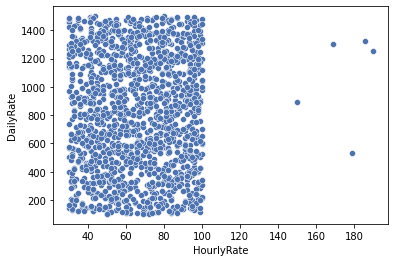

In [302]:
sns.scatterplot(data=data_df, x= 'HourlyRate', y='DailyRate')

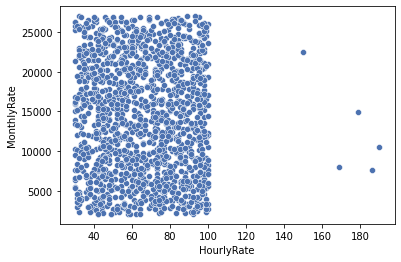

In [303]:
sns.scatterplot(data=data_df, x= 'HourlyRate', y='MonthlyRate')

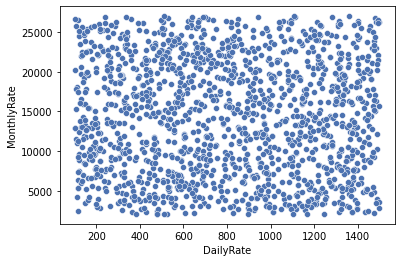

In [304]:
sns.scatterplot(data=data_df, x= 'DailyRate', y='MonthlyRate')

De las anteriores gráficas se concluye que no existe relación con estas variables, por lo que para cambiar los valores atípicos se imputara la mediana.

In [305]:
data_df['HourlyRate'].median()

66.0

In [306]:
data_df.loc[data_df['HourlyRate']>125,'HourlyRate'] = data_df['HourlyRate'].median()

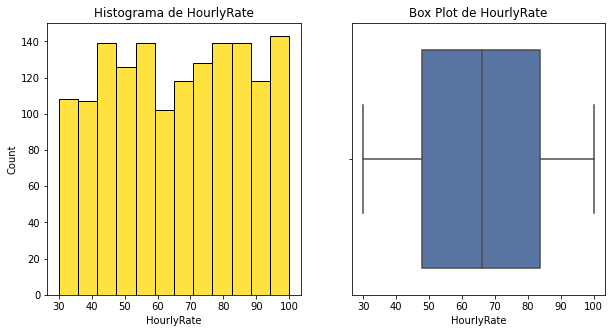

In [307]:
plot_hist_box(data_df, 'HourlyRate')

Variable `JobInvolvement`

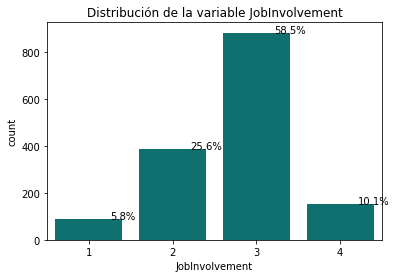

In [308]:
plot_count_plot_percentages(data_df, 'JobInvolvement')

La variable cuenta con 4 categorías, donde el 58.5% tiene un JobInvolvement de 3 y el 5.8% tiene un JobInvolvement de 1. 

Variable `JobLevel`

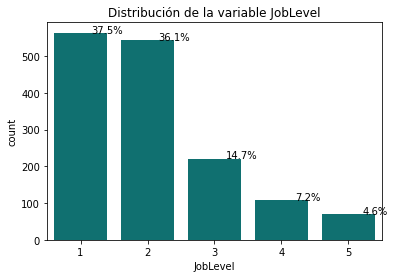

In [309]:
plot_count_plot_percentages(data_df, 'JobLevel')

La variable cuenta con 5 categorías. El 73.6% de los empleados tienen puestos menos importantes, categorías 1 y 2. Asimismo, el 11.8% tiene puestos importantes con categorías de 4 y 5.

Variable `JobRole`

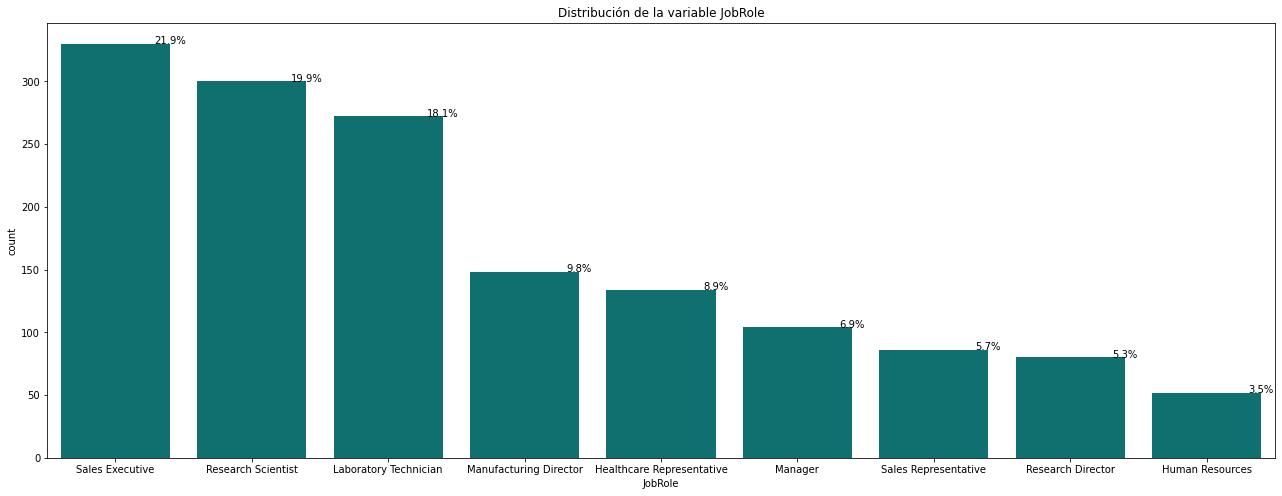

In [310]:
fig, ax = plt.subplots(figsize=(22, 8))
plot_count_plot_percentages(data_df, 'JobRole')

Esta variable cuenta con 10 categorías, la mayor parte de los empleados se ubican en Sles Executive y Research Scientist con el 41.8%, y la de menor porcentaje es Human Resources con el 3.5%.

Variable `MaritalStatus`

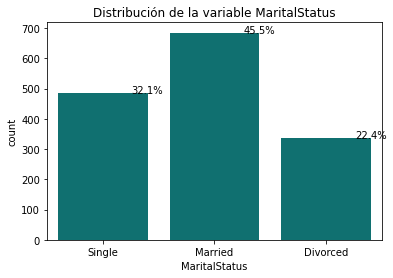

In [311]:
plot_count_plot_percentages(data_df, 'MaritalStatus')

Contamos con tres categorías pora la variable MaritalStatus, la mayor parte de los empleados son casados con el 45.5%.

Variable `MonthlyIncome`

In [312]:
data_df['MonthlyIncome'].describe()

count    1.506000e+03
mean     1.303036e+04
std      2.551646e+05
min      2.500000e+01
25%      2.886000e+03
50%      4.877500e+03
75%      8.307750e+03
max      9.907000e+06
Name: MonthlyIncome, dtype: float64

El valor máximo parece ser que fue mal imputado y fueron agregados 3 ceros al valor original. Por ende, se procede a dividr este valor por 1000.

Por otra parte, tambien hay valores muy pequeños y se concluye que se digitaron mal y faltan 2 ceros. Por ende, se procede a multiplicar estos valores por 100.

In [313]:
data_df.loc[data_df['MonthlyIncome']>0.5e7,'MonthlyIncome'] = data_df.loc[data_df['MonthlyIncome']>0.5e7,'MonthlyIncome']/1000

In [314]:
data_df.loc[data_df['MonthlyIncome']<1000,'MonthlyIncome'] = data_df.loc[data_df['MonthlyIncome']<1000,'MonthlyIncome']*100

In [315]:
data_df['MonthlyIncome'].describe()

count     1506.000000
mean      6463.515936
std       4699.752633
min       1009.000000
25%       2886.750000
50%       4880.500000
75%       8307.750000
max      19999.000000
Name: MonthlyIncome, dtype: float64

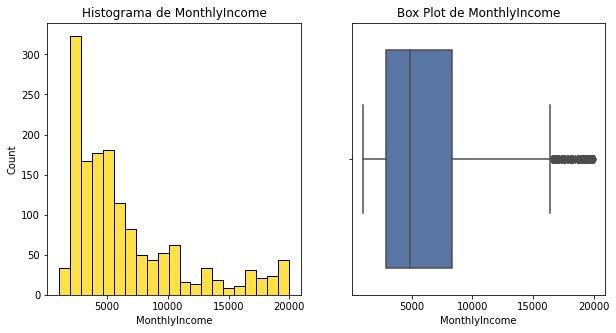

In [316]:
plot_hist_box(data_df, 'MonthlyIncome')

Se tienen salarios entre 1009 y 19999 dolares al mes. Tenemos algunos valores atípicos por encima de 8200 dolars al mes, sin embargo dejaremos estos valores sin cambio porque son importantes para el análisis.

Variable `MonthlyRate`

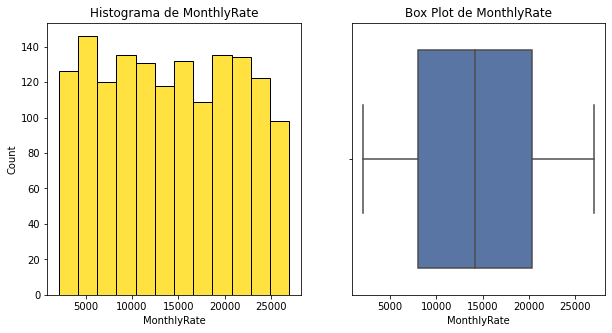

In [317]:
plot_hist_box(data_df, 'MonthlyRate')

In [318]:
data_df['MonthlyRate'].describe()

count     1506.000000
mean     14244.022576
std       7105.627164
min       2094.000000
25%       8041.250000
50%      14144.000000
75%      20385.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

El 50% de los empleados tiene un monthly rate de 14199 y los valores mínimo y máximo de esta variable son 2094 y 26999 respectivamente. No se presentan valores atípicos.

Variable `NumCompaniesWorked`

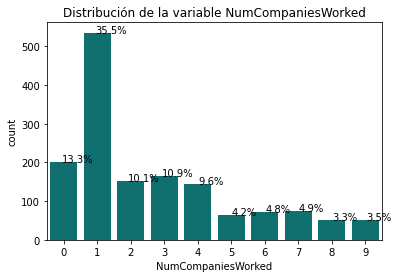

In [319]:
plot_count_plot_percentages(data_df, 'NumCompaniesWorked')

La variable cuenta con 10 categorías, el 35.5% de los empleados han trabajado por 1 compañía y el 3.5% para 9.

Variable `Over18`

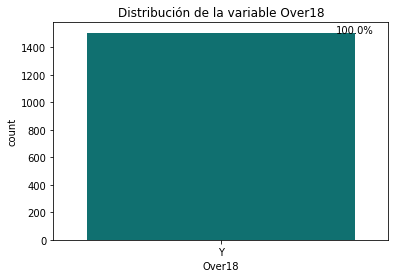

In [320]:
plot_count_plot_percentages(data_df, 'Over18')

El 100% de los empleados cuenta con 18 años o más. Como esta variable es la misma para todos los registros, No se tendrá en cuenta en los modelos.

Variable `OverTime`

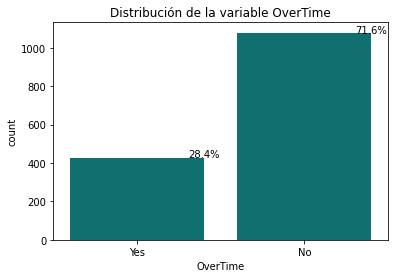

In [321]:
plot_count_plot_percentages(data_df, 'OverTime')

Sólo el 28.4% de los empleados trabaja horas extras.

Variable `PercentSalaryHike`

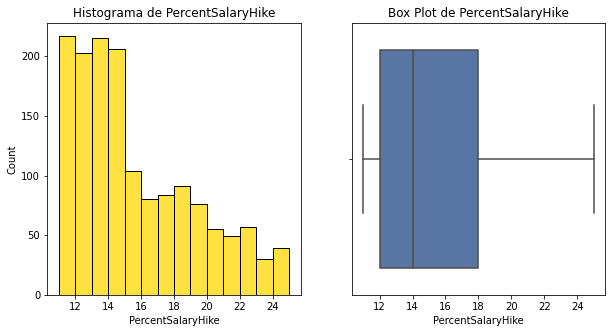

In [322]:
plot_hist_box(data_df, 'PercentSalaryHike')

In [323]:
data_df['PercentSalaryHike'].describe()

count    1506.000000
mean       15.191899
std         3.655746
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

Esta variable representa el incremento del salario en porcentaje. Toma valores entre 11% y 25%. Asimismo, de acuerdo al diagrama de cajas no se observan valores atípicos.

Variable `PerformanceRating`

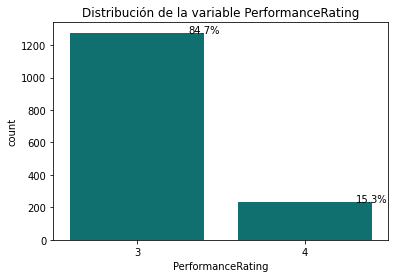

In [324]:
plot_count_plot_percentages(data_df, 'PerformanceRating')

El 84.7% de los empleados tienen un performance de 3 y el 15.3% de 4.

Variable `RelationshipSatisfaction`

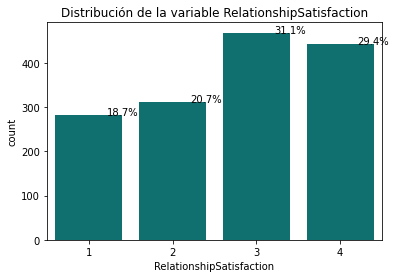

In [325]:
plot_count_plot_percentages(data_df, 'RelationshipSatisfaction')

La variable cuenta con 4 categorías, si asumimos que más alta es mejor encontramos que el 60.5% tienen una satisfacción entre 3 y 4 y el 39.5 entre 1 y 2.

Variable `StandardHours`

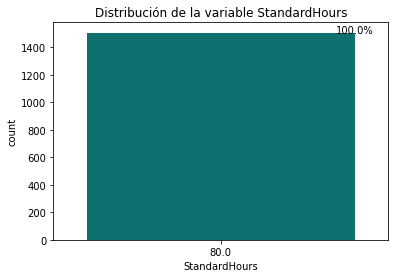

In [326]:
plot_count_plot_percentages(data_df, 'StandardHours')

Las horas de trabajo estándar por semana en la empresa son de 80. Como esta variable es la misma para todos los registros, No se tendrá en cuenta en los modelos.

Variable `StockOptionLevel`

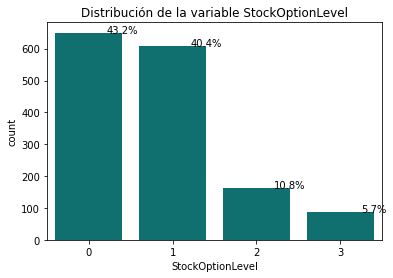

In [327]:
plot_count_plot_percentages(data_df, 'StockOptionLevel')

La variable cuenta con 4 categorías, de las cuales el 43.2% cuentan con opciones 0 y el 5.7% con opción tipo 3.

Variable `TotalWorkingYears`

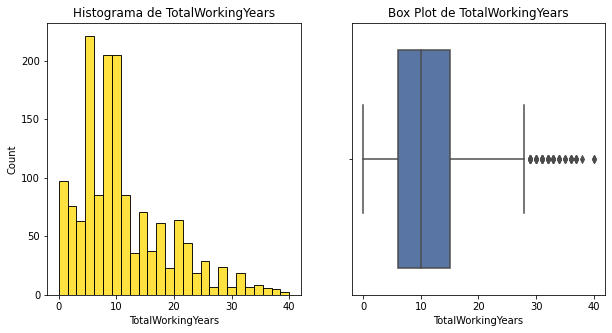

In [328]:
plot_hist_box(data_df, 'TotalWorkingYears')

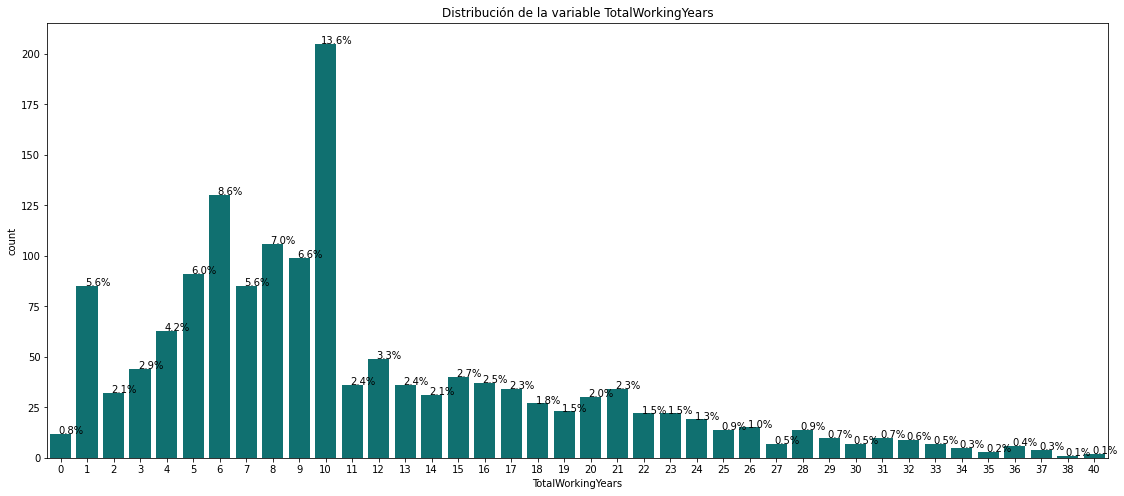

In [329]:
fig, ax = plt.subplots(figsize=(19, 8))
plot_count_plot_percentages(data_df, 'TotalWorkingYears')

In [330]:
data_df[data_df['TotalWorkingYears']> 35][['Age','TotalWorkingYears']]

,Age,TotalWorkingYears
85,56.0,37
98,58.0,38
126,58.0,40
187,55.0,36
270,55.0,37
401,56.0,36
445,55.0,37
595,58.0,40
894,54.0,36
956,56.0,36


Tenemos empleados entre 0 y 40 años trabajando. El 13.6% cuenta con 10 años y el 0-1% con 40 años. Se revisaron que la edad de los empleados estuviera acorde con el tiempo en que han trabajado y todos son mayores de 50 años por lo que se infiere que es correcto. Tenemos algunos valores atípicos por encima de 29 años, sin embargo dejaremos estos valores sin cambio.

Variable `TrainingTimesLastYear`

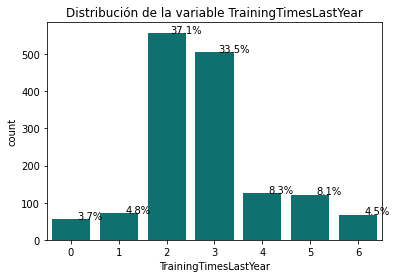

In [331]:
plot_count_plot_percentages(data_df, 'TrainingTimesLastYear')

La variable toma valores entre 0 y 6. El 70.6% de los empleados a tenido un tiempo de entrenamiento en el último año de 2 y 3. El 3.7% de 0.

Variable `WorkLifeBalance`

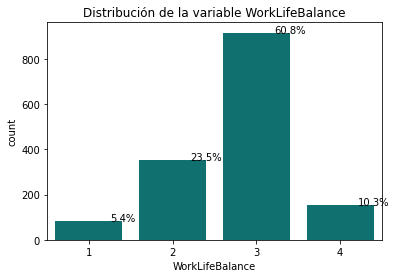

In [332]:
plot_count_plot_percentages(data_df, 'WorkLifeBalance')

La variable toma valores entre 1 y 4. El 71.1% de los empleados tienen un buen balance entre vida y trabajo, ente 3 y 4. El 5.4% tiene un bajo balance de 1.

Variable `YearsAtCompany`

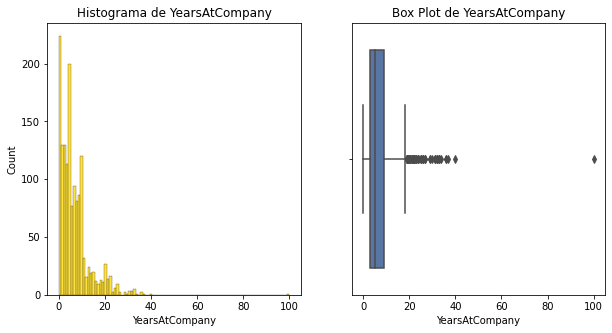

In [333]:
plot_hist_box(data_df, 'YearsAtCompany')

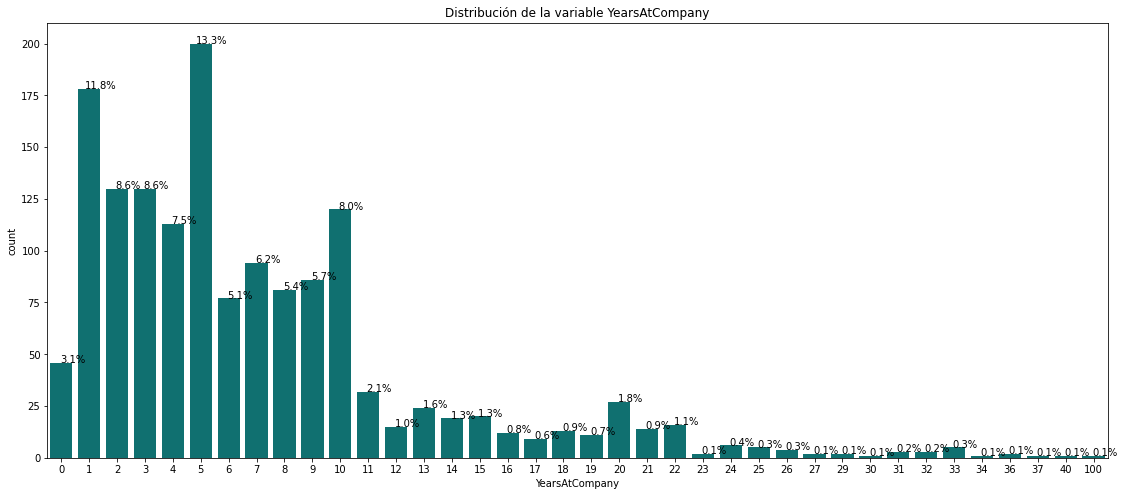

In [334]:
fig, ax = plt.subplots(figsize=(19, 8))
plot_count_plot_percentages(data_df, 'YearsAtCompany')

In [335]:
data_df[data_df['YearsAtCompany']>40]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
503,4.0,34.0,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,1,...,80.0,1,10,4,2,100,9,8,8,0


Observamos un valor de 100 en la variable YearstCompany. Al consultar el dato, encontramos que es para un empleado de 34 años con 10 años en la variable TotalWorkingYears. Asumimos que es un valor mal registrado y para corregirlo lo dividimos en 10, es decir el valor correcto sería de 10 años

In [336]:
data_df.loc[data_df['YearsAtCompany']>40, 'YearsAtCompany'] = 10

In [337]:
data_df['YearsAtCompany'].describe()

count    1506.000000
mean        6.981408
std         6.115580
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

La variable toma valores desde 0 para empleados contratados el último año y 40 años. Contamos con valores atípicos por encima de 19 años, sin embargo optamos por dejarlos dado que en nuestro análisis los consideraremos.

Variable `YearsInCurrentRole`

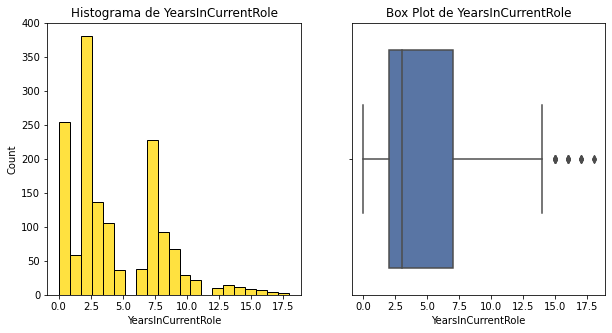

In [338]:
plot_hist_box(data_df, 'YearsInCurrentRole')

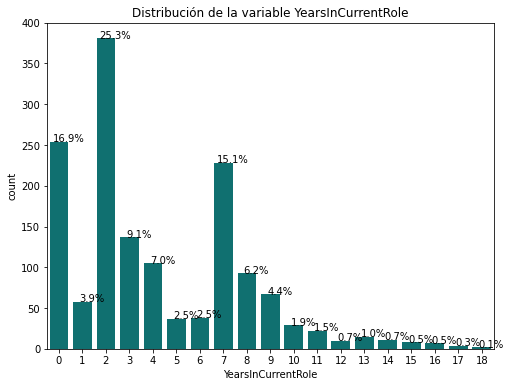

In [339]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_count_plot_percentages(data_df, 'YearsInCurrentRole')

La variable se distribuye entre 0 y 18 años. El 64.69% de los empleados lleva hasta 5 años en su puesto actual, el 15.1% lleva 7 años y sólo el 0.1% de los empleados lleva 18 años en su cargo actual.

Variable `YearsSinceLastPromotion`

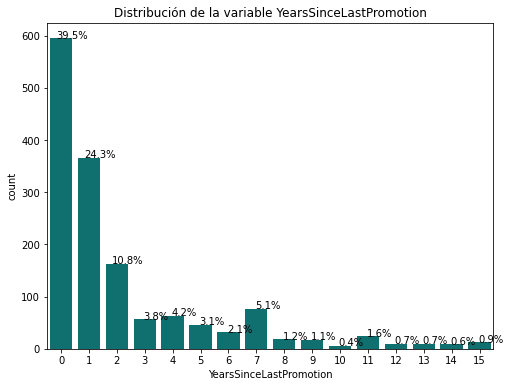

In [340]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_count_plot_percentages(data_df, 'YearsSinceLastPromotion')

La variable toma valores enteros entre 0 y 15 años. El 85.7% de los empleados ha tenido una promoción en los últimos 5 años. Sólo el 0.9% ha tenido una promoción en los últimos 15 años.

Variable `YearsWithCurrManager`

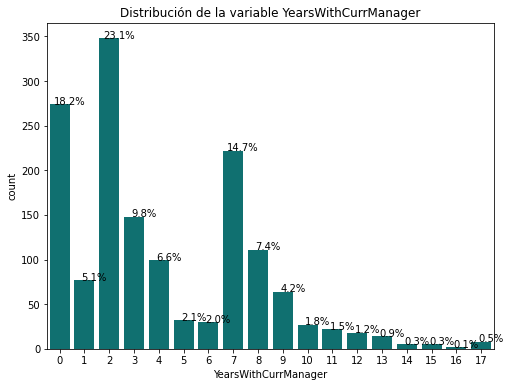

In [341]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_count_plot_percentages(data_df, 'YearsWithCurrManager')

La variable se distribuye entre 0 años que significa una asignación de mananger relativamente reciente y 17 años. El 64.9% de los empleados lleva menos de 5 años con su manager y sólo el 0.5% 17 años.

Variable `NewEmployee`

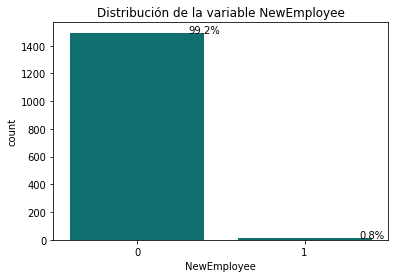

In [342]:
plot_count_plot_percentages(data_df, 'NewEmployee')

El 100% de los empleados son antiguos.

## Análisis bivariado

In [343]:
correlation_df = data_df.drop(['Over18', 'StandardHours', 'NewEmployee', 'EmployeeNumber'], axis = 1).corr()
correlation_df

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,1.000000,-0.006581,0.033041,-0.000678,-0.010619,-0.017519,-0.009773,-0.065197,-0.014026,-0.004167,...,-0.003696,-0.006297,0.001223,-0.021613,0.001689,-0.022694,-0.003352,-0.003484,-0.017950,-0.024450
Age,-0.006581,1.000000,0.011830,-0.012388,0.202042,-0.013802,0.010001,0.019906,0.026796,0.511140,...,0.000614,0.054188,0.037998,0.679189,-0.019374,-0.019371,0.314953,0.217820,0.218111,0.204836
DailyRate,0.033041,0.011830,1.000000,-0.003234,-0.020554,0.016470,0.020272,0.025853,0.039691,0.000630,...,-0.000869,0.007040,0.043561,0.012592,-0.003081,-0.041068,-0.035999,0.011055,-0.032282,-0.031137
DistanceFromHome,-0.000678,-0.012388,-0.003234,1.000000,0.010938,-0.022914,-0.014165,0.028564,0.005401,0.001254,...,0.031394,0.001979,0.047167,-0.002332,-0.037896,-0.030884,0.004894,0.016900,0.008902,0.015389
Education,-0.010619,0.202042,-0.020554,0.010938,1.000000,0.002109,-0.022055,0.009760,0.033747,0.107740,...,-0.027943,-0.005672,0.013140,0.151098,-0.024939,0.018616,0.073190,0.063929,0.053745,0.072214
EmployeeCount,-0.017519,-0.013802,0.016470,-0.022914,0.002109,1.000000,0.006392,0.011526,0.009732,-0.024589,...,-0.010944,0.006859,0.006358,-0.010676,0.023874,0.008807,0.004295,-0.030020,-0.017507,0.020840
EnvironmentSatisfaction,-0.009773,0.010001,0.020272,-0.014165,-0.022055,0.006392,1.000000,-0.051417,-0.003840,0.003015,...,-0.024819,0.006015,0.005281,-0.001568,-0.014793,0.031582,0.000837,0.022633,0.015095,-0.004926
HourlyRate,-0.065197,0.019906,0.025853,0.028564,0.009760,0.011526,-0.051417,1.000000,0.041643,-0.034445,...,-0.005760,-0.004238,0.054249,-0.008511,-0.008374,-0.011281,-0.024886,-0.030489,-0.027601,-0.026233
JobInvolvement,-0.014026,0.026796,0.039691,0.005401,0.033747,0.009732,-0.003840,0.041643,1.000000,-0.012979,...,-0.027497,0.039985,0.024357,-0.010003,-0.013216,-0.022748,-0.027031,0.008620,-0.025673,0.021522
JobLevel,-0.004167,0.511140,0.000630,0.001254,0.107740,-0.024589,0.003015,-0.034445,-0.012979,1.000000,...,-0.019486,0.025480,0.013703,0.783905,-0.017941,0.038299,0.538469,0.397059,0.354341,0.379368


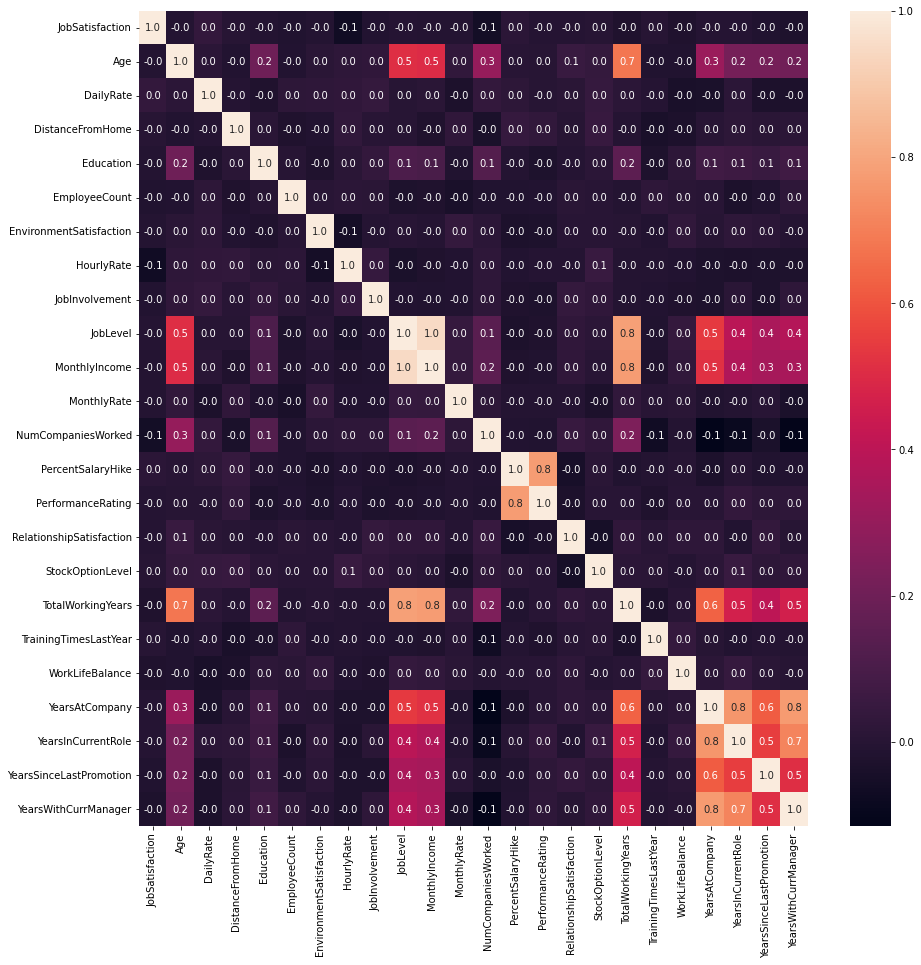

In [344]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_df, annot=True, fmt= '.1f')

Del mapa de calor y la matriz de correlación podemos concluir que las variables con una correlación mayor a 0.5 son en orden descendente:

*   JobLevel - MonthlyIncome
*   JobLevel - TotalWorkingYears
*   MonthlyIncome - TotalWorkingYears
*   PercentSalatyHike - PerformanceRating
*   YearsAtCompany - YearsInCurrentRole
*   YearsAtCompany - YearsWithCurrManager
*   Age - TotalWorkingYears
*   YearsInCurrentRole - YearsWithCurrManager
*   TotalWorkingYears - YearsAtCompany

In [345]:
sorted_mat = correlation_df.apply(np.abs).unstack().dropna().sort_values(ascending=False)

Se grafican las relaciones más altas, las que están por encima de 0.5

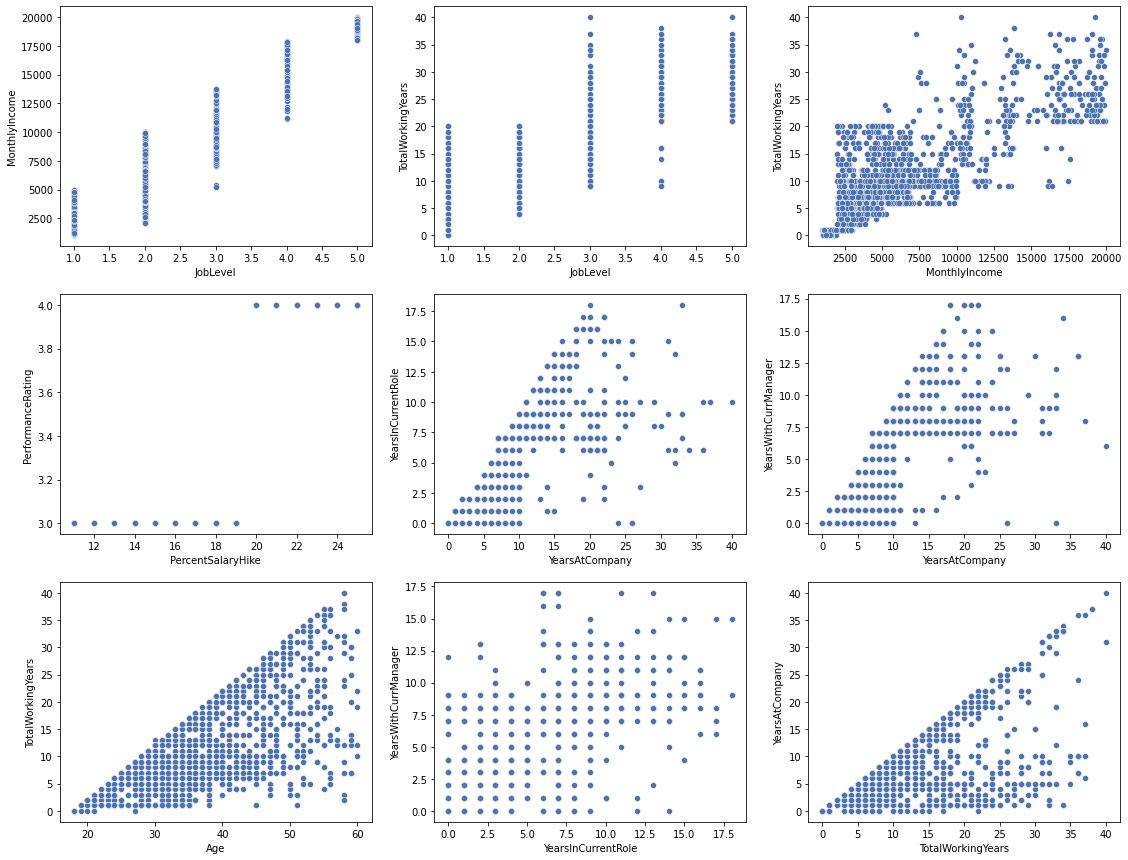

In [346]:
fig, axs = plt.subplots(3,3, figsize=(19, 15))

sns.scatterplot(data=data_df, x= 'JobLevel', y='MonthlyIncome', ax=axs[0,0])
sns.scatterplot(data=data_df, x= 'JobLevel', y='TotalWorkingYears', ax=axs[0,1])
sns.scatterplot(data=data_df, x= 'MonthlyIncome', y='TotalWorkingYears', ax=axs[0,2])

sns.scatterplot(data=data_df, x= 'PercentSalaryHike', y='PerformanceRating',ax=axs[1,0])
sns.scatterplot(data=data_df, x= 'YearsAtCompany', y='YearsInCurrentRole',ax=axs[1,1])
sns.scatterplot(data=data_df, x= 'YearsAtCompany', y='YearsWithCurrManager',ax=axs[1,2])

sns.scatterplot(data=data_df, x= 'Age', y='TotalWorkingYears',ax=axs[2,0])
sns.scatterplot(data=data_df, x= 'YearsInCurrentRole', y='YearsWithCurrManager',ax=axs[2,1])
sns.scatterplot(data=data_df, x= 'TotalWorkingYears', y='YearsAtCompany',ax=axs[2,2])


De lo anterior se observa que las variables con mayor correlación son las referentes a los años. Para escoger las features más relevantes, removeremos aquellas que tengan una correlación mayor a 0.7 y seleccionamos aquellas que tengan mayor correlación con la variable objetivo.

In [347]:
sorted_mat[(sorted_mat>0.7) & (sorted_mat<1)]
columns_array = sorted_mat[(sorted_mat>0.7) & (sorted_mat<1)].index

In [348]:
variables_remove = ['JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']

In [349]:
variables_remove

['JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']

A continuación se realiza la selección de variables

In [350]:
processed_df = data_df.copy()

In [351]:
processed_final_df = processed_df.drop(['Over18', 'StandardHours', 'NewEmployee', 'EmployeeNumber'], axis = 1)
for variable in variables_remove:
  processed_final_df = processed_final_df.drop([variable], axis = 1)

Responda las preguntas:
* ¿Qué variables impactan en mayor nivel la satisfacción de los empleados?
* ¿Qué variables parecen no ser relevantes para el análisis?

Correlaciones con variable objetivo “JobSatisfaction”

In [352]:
processed_final_df.columns

Index(['JobSatisfaction', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [353]:
correlation_df['JobSatisfaction'].sort_values(ascending=False)

JobSatisfaction             1.000000
DailyRate                   0.033041
PercentSalaryHike           0.012828
TrainingTimesLastYear       0.001689
StockOptionLevel            0.001223
DistanceFromHome           -0.000678
YearsAtCompany             -0.003352
YearsInCurrentRole         -0.003484
PerformanceRating          -0.003696
JobLevel                   -0.004167
RelationshipSatisfaction   -0.006297
Age                        -0.006581
MonthlyRate                -0.008019
EnvironmentSatisfaction    -0.009773
MonthlyIncome              -0.010389
Education                  -0.010619
JobInvolvement             -0.014026
EmployeeCount              -0.017519
YearsSinceLastPromotion    -0.017950
TotalWorkingYears          -0.021613
WorkLifeBalance            -0.022694
YearsWithCurrManager       -0.024450
NumCompaniesWorked         -0.056671
HourlyRate                 -0.065197
Name: JobSatisfaction, dtype: float64

De las correlaciones podemos observar que no son muy altas con respecto a la variable objetivo. De las variables con mayor correlación estan: `HourlyRate` con -0.065, `NumCompaniesWorked` con -0.057, `DailyRate` con 0.033, `WorkLifeBalance` con 0.023, `YearsSinceLastPromotion` con 0.018.


Con respecto a las variables que al parecer no son relevantes para el análisis están las que tienen un sólo valor en todo el dataset, `Over18`, `StandardHours` y `NewEmployee`. Y por otra parte, otra variable que no se tendra en cuenta es `EmployeeNumber` porque es tomado como identificador.

## Preprocesamiento

Variable `Attrition`

In [354]:
processed_final_df['Attrition'] = processed_final_df['Attrition'].replace({'Yes': 1, 'No': 0})
processed_final_df['Attrition'].unique()

array([1, 0])

Variable `BusinessTravel`

In [355]:
processed_final_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [356]:
enc = OneHotEncoder(handle_unknown='ignore')
def encode_onehot(processed_data_df, column):
  encoder_df = pd.DataFrame(enc.fit_transform(processed_data_df[[column]]).toarray())
  encoder_df.columns = enc.get_feature_names([column])

  #merge one-hot encoded columns back with original DataFrame
  final_test_df = processed_data_df.drop(column, axis=1).reset_index().drop('index', axis=1)
  final_test_df = pd.concat([final_test_df, encoder_df], axis = 1)
  return final_test_df

In [357]:
processed_final_df = encode_onehot(processed_final_df, 'BusinessTravel')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Variable `Department`

In [358]:
processed_final_df = encode_onehot(processed_final_df, 'Department')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Variable `EducationField`

In [359]:
processed_final_df = encode_onehot(processed_final_df, 'EducationField')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Variable `Gender`

In [360]:
processed_final_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [361]:
processed_final_df['Gender'] = processed_final_df['Gender'].replace({'Male': 1, 'Female': 0})

Variable `JobRole`

In [362]:
processed_final_df = encode_onehot(processed_final_df, 'JobRole')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Variable `MaritalStatus`

In [363]:
processed_final_df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [364]:
processed_final_df = encode_onehot(processed_final_df, 'MaritalStatus')

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Variable `OverTime`

In [365]:
processed_final_df['OverTime'] = processed_final_df['OverTime'].replace({'Yes': 1, 'No': 0})
processed_final_df['OverTime'].unique()

array([1, 0])

In [366]:
processed_final_df.head()

,JobSatisfaction,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,41.0,1,1102,1,2,1,2,0,94,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,49.0,0,279,8,1,1,3,1,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,37.0,1,1373,2,2,1,4,1,92,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,33.0,0,1392,3,4,1,4,0,56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2.0,33.0,0,591,2,1,1,1,1,40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [367]:
data_val = processed_final_df[processed_final_df['JobSatisfaction'].isnull()]
processed_final_df = processed_final_df.dropna(subset=['JobSatisfaction'])

## Construcción y selección del mejor modelo

A continuación se realiza la separación de los conjuntos de entrenamiento, validación y prueba

In [202]:
X = processed_final_df.drop('JobSatisfaction', axis=1)
Y = processed_final_df[['JobSatisfaction']]
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [203]:
X_standard_df = pd.DataFrame(standard_scaler.fit_transform(X), columns = X.columns)
X_min_max_df = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)

In [204]:
X_train_standard, X_test_standard, Y_train_standard, Y_test_standard = train_test_split(X_standard_df, Y, test_size = 0.2, random_state=1)
X_train_standard, X_val_standard, Y_train_standard, y_val_standard= train_test_split(X_train_standard, Y_train_standard, test_size = 0.2)

X_train_minmax, X_test_minmax, Y_train_minmax, Y_test_minmax = train_test_split(X_standard_df, Y, test_size = 0.2, random_state=1)
X_train_minmax, X_val_minmax, Y_train_minmax, y_val_minmax= train_test_split(X_train_minmax, Y_train_minmax, test_size = 0.2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train, X_val, Y_train, y_val= train_test_split(X_train, Y_train, test_size = 0.2)

### Regresión logística

Para la búsqueda y elección del modelo se procede con cada algoritmo a hacer la búsqueda de hiperpárametros con una búsqueda gridsearch para el caso de estandarización standard y minmax 

In [ ]:
param_grid_lr = {'C': [0.0001, 0.001, 0.1, 1],
                 'max_iter':[500],
                 'solver':['newton-cg', 'lbfgs', 'liblinear']}
      #    'average':['weighted']}
       # 'multi_class':['ovr']} 
  
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, refit = True, verbose = 3,scoring='f1_weighted', cv=3)
  
# fitting the model for grid search
grid_lr.fit(X_train_standard, Y_train_standard.values.ravel())



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.162 total time=   0.0s
[CV 2/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.153 total time=   0.0s
[CV 3/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.169 total time=   0.0s
[CV 1/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.162 total time=   0.0s
[CV 2/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.153 total time=   0.0s
[CV 3/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.169 total time=   0.0s
[CV 1/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.285 total time=   0.0s
[CV 2/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.281 total time=   0.0s
[CV 3/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.278 total time=   0.0s
[CV 1/3] END C=0.001, max_iter=500, solver=newton-cg;, score=0.239 total time=   0.0s
[CV 2/3] END C=0.001, max_iter=500, solver=newton-cg;, score=0.220 total time=   0

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1], 'max_iter': [500],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1_weighted', verbose=3)

In [ ]:
pred_yVal_standard=grid_lr.predict(X_val_standard)
print(classification_report(y_val_standard, pred_yVal_standard))

              precision    recall  f1-score   support

         1.0       0.18      0.06      0.09        48
         2.0       0.19      0.11      0.14        44
         3.0       0.34      0.47      0.40        72
         4.0       0.33      0.43      0.37        75

    accuracy                           0.31       239
   macro avg       0.26      0.27      0.25       239
weighted avg       0.28      0.31      0.28       239



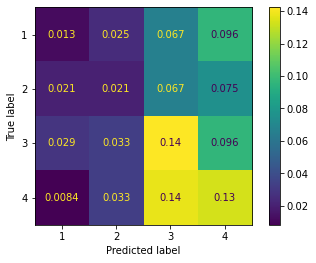

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val_standard.astype(int), pred_yVal_standard, normalize = 'all')

In [ ]:
param_grid_lr_mm = {'C': [0.0001, 0.001, 0.1, 1],
                 'max_iter':[500],
                 'solver':['newton-cg', 'lbfgs', 'liblinear']}
      #    'average':['weighted']}
       # 'multi_class':['ovr']} 
  
grid_lr_mm = GridSearchCV(LogisticRegression(), param_grid_lr, refit = True, verbose = 3,scoring='f1_weighted', cv=3)
  
# fitting the model for grid search
grid_lr_mm.fit(X_train_minmax, Y_train_minmax.values.ravel())



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.152 total time=   0.1s
[CV 2/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.172 total time=   0.1s
[CV 3/3] END C=0.0001, max_iter=500, solver=newton-cg;, score=0.160 total time=   0.1s
[CV 1/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.152 total time=   0.0s
[CV 2/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.172 total time=   0.0s
[CV 3/3] END C=0.0001, max_iter=500, solver=lbfgs;, score=0.160 total time=   0.0s
[CV 1/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.280 total time=   0.0s
[CV 2/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.222 total time=   0.0s
[CV 3/3] END C=0.0001, max_iter=500, solver=liblinear;, score=0.280 total time=   0.0s
[CV 1/3] END C=0.001, max_iter=500, solver=newton-cg;, score=0.252 total time=   0.0s
[CV 2/3] END C=0.001, max_iter=500, solver=newton-cg;, score=0.205 total time=   0

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1], 'max_iter': [500],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1_weighted', verbose=3)

In [ ]:
pred_yVal_mm=grid_lr.predict(X_val_minmax)
print(classification_report(y_val_minmax, pred_yVal_mm))

              precision    recall  f1-score   support

         1.0       0.50      0.16      0.25        43
         2.0       0.29      0.14      0.19        42
         3.0       0.41      0.57      0.48        76
         4.0       0.43      0.55      0.49        78

    accuracy                           0.41       239
   macro avg       0.41      0.36      0.35       239
weighted avg       0.41      0.41      0.39       239



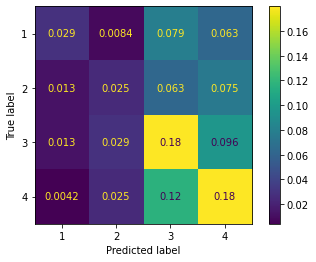

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val_minmax.astype(int), pred_yVal_mm, normalize = 'all')

### Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid_dt = {'max_depth': [2,5,10,100],
                 'max_leaf_nodes':[None,2,10,20],
                 'random_state':[30]}
  
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit = True, verbose = 3,scoring='f1_weighted', cv=3)
  
# fitting the model for grid search
grid_dt.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=2, max_leaf_nodes=None, random_state=30;, score=0.237 total time=   0.0s
[CV 2/3] END max_depth=2, max_leaf_nodes=None, random_state=30;, score=0.188 total time=   0.0s
[CV 3/3] END max_depth=2, max_leaf_nodes=None, random_state=30;, score=0.204 total time=   0.0s
[CV 1/3] END max_depth=2, max_leaf_nodes=2, random_state=30;, score=0.231 total time=   0.0s
[CV 2/3] END max_depth=2, max_leaf_nodes=2, random_state=30;, score=0.191 total time=   0.0s
[CV 3/3] END max_depth=2, max_leaf_nodes=2, random_state=30;, score=0.175 total time=   0.0s
[CV 1/3] END max_depth=2, max_leaf_nodes=10, random_state=30;, score=0.237 total time=   0.0s
[CV 2/3] END max_depth=2, max_leaf_nodes=10, random_state=30;, score=0.188 total time=   0.0s
[CV 3/3] END max_depth=2, max_leaf_nodes=10, random_state=30;, score=0.204 total time=   0.0s
[CV 1/3] END max_depth=2, max_leaf_nodes=20, random_state=30;, score=0.237 total time=   0

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 100],
                         'max_leaf_nodes': [None, 2, 10, 20],
                         'random_state': [30]},
             scoring='f1_weighted', verbose=3)

In [ ]:
pred_yVal_dt=grid_dt.predict(X_val)
print(classification_report(y_val_minmax, pred_yVal_dt))

              precision    recall  f1-score   support

         1.0       0.16      0.21      0.18        43
         2.0       0.17      0.17      0.17        42
         3.0       0.31      0.29      0.30        76
         4.0       0.28      0.26      0.27        78

    accuracy                           0.24       239
   macro avg       0.23      0.23      0.23       239
weighted avg       0.25      0.24      0.25       239



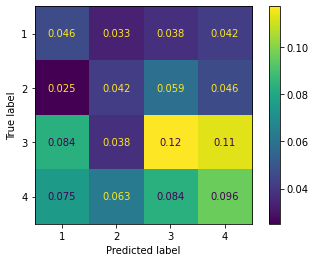

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val.astype(int), pred_yVal_dt, normalize = 'all')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid_rf = {'n_estimators': [100,150,500,1000],
                 'max_depth':[10,50,100],
                 'max_features':["sqrt", "log2", None],
                 'bootstrap':[True,False],
                 'random_state':[30],
                 'class_weight':["balanced", "balanced_subsample"]}
  
grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, refit = True, verbose = 3,scoring='f1_weighted', cv=3,random_state=33)
  
# fitting the model for grid search
grid_rf.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.320 total time=   0.4s
[CV 2/3] END bootstrap=False, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.283 total time=   0.5s
[CV 3/3] END bootstrap=False, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.279 total time=   0.4s
[CV 1/3] END bootstrap=True, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.287 total time=   0.4s
[CV 2/3] END bootstrap=True, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.286 total time=   0.4s
[CV 3/3] END bootstrap=True, class_weight=balanced, max_depth=50, max_features=log2, n_estimators=150, random_state=30;, score=0.230 total time=   0.4s
[CV 1/3] END bootstrap=T

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 150, 500, 1000],
                                        'random_state': [30]},
                   random_state=33, scoring='f1_weighted', verbose=3)

In [ ]:
pred_yVal_rf=grid_rf.predict(X_val)
print(classification_report(y_val_minmax, pred_yVal_rf))

              precision    recall  f1-score   support

         1.0       0.15      0.14      0.15        43
         2.0       0.22      0.19      0.21        42
         3.0       0.30      0.30      0.30        76
         4.0       0.30      0.33      0.31        78

    accuracy                           0.26       239
   macro avg       0.24      0.24      0.24       239
weighted avg       0.26      0.26      0.26       239



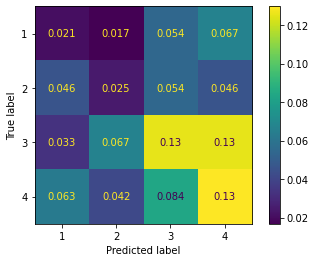

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val.astype(int), pred_yVal_rf, normalize = 'all')

### XGboost
Modelo base

In [209]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train_standard, Y_train_standard)
predictions = gbm.predict(X_val_standard)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [210]:
print(classification_report(y_val_standard, predictions))

              precision    recall  f1-score   support

         1.0       0.22      0.13      0.16        39
         2.0       0.17      0.12      0.14        43
         3.0       0.36      0.41      0.38        79
         4.0       0.39      0.50      0.44        78

    accuracy                           0.34       239
   macro avg       0.29      0.29      0.28       239
weighted avg       0.32      0.34      0.32       239



A continuación se realiza la variación de hiperparánetros del modelo de XGboost:

In [211]:
from sklearn.utils import validation
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1],
    "n_estimators" : [100, 200, 300, 500, 600],
    "max_depth" : [2,3,4,6,10]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

grid = RandomizedSearchCV(gbm, 
                           param_grid, 
                           scoring='f1_weighted', 
                           cv=3, 
                           n_iter=10,
                           verbose=1,
                           random_state=33)
# Fit grid search
grid_result = grid.fit(X_train, Y_train.values.ravel())
# Print grid search summary
grid_result

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(learning_rate=0.05, n_estimators=300,
                                           objective='multi:softprob'),
                   param_distributions={'max_depth': [2, 3, 4, 6, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         600],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0, 0.5, 1]},
                   random_state=33, scoring='f1_weighted', verbose=1)

In [212]:
best_base = grid_result.best_estimator_
print(grid_result.best_params_)
predictions = best_base.predict(X_val_standard)
print(classification_report(y_val_standard, predictions))

{'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3}
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        39
         2.0       0.00      0.00      0.00        43
         3.0       0.33      0.87      0.48        79
         4.0       0.23      0.09      0.13        78

    accuracy                           0.32       239
   macro avg       0.14      0.24      0.15       239
weighted avg       0.19      0.32      0.20       239



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


StandardScaler

In [213]:
grid_result = grid.fit(X_train_standard, Y_train_standard.values.ravel())
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_val_standard)
print(classification_report(y_val_standard, predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

         1.0       0.17      0.13      0.14        39
         2.0       0.24      0.19      0.21        43
         3.0       0.43      0.46      0.44        79
         4.0       0.38      0.45      0.41        78

    accuracy                           0.35       239
   macro avg       0.30      0.30      0.30       239
weighted avg       0.34      0.35      0.34       239



In [214]:
print("Hiperparámetros del mejor modelo con transformación StandarScaler: ", grid_result.best_params_)

Hiperparámetros del mejor modelo con transformación StandarScaler:  {'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 600, 'max_depth': 4}


MinMaxScaler

In [215]:
grid_result = grid.fit(X_train_minmax, Y_train_minmax.values.ravel())
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_val_minmax)
print(classification_report(y_val_standard, predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

         1.0       0.26      0.15      0.19        39
         2.0       0.18      0.09      0.12        43
         3.0       0.32      0.39      0.35        79
         4.0       0.32      0.40      0.35        78

    accuracy                           0.30       239
   macro avg       0.27      0.26      0.26       239
weighted avg       0.29      0.30      0.29       239



In [216]:
print("Hiperparámetros del mejor modelo con transformación StandarScaler: ", grid_result.best_params_)

Hiperparámetros del mejor modelo con transformación StandarScaler:  {'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 10}


Aplicación de PCA:

In [217]:
pca = PCA(n_components=25)
X_train_standard_pca = pca.fit_transform(X_train_standard)
X_val_standard_pca = pca.fit_transform(X_val_standard)
X_test_standard_pca = pca.fit_transform(X_test_standard)

X_train_min_max_pca = pca.fit_transform(X_train_minmax)
X_val_min_max_pca = pca.fit_transform(X_val_minmax)
X_test_min_max_pca = pca.fit_transform(X_test_minmax)

StandardScaler

In [218]:
grid_result = grid.fit(X_train_standard_pca, Y_train_standard.values.ravel())
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_val_standard_pca)
print(classification_report(y_val_standard, predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

         1.0       0.30      0.21      0.24        39
         2.0       0.16      0.14      0.15        43
         3.0       0.33      0.35      0.34        79
         4.0       0.29      0.33      0.31        78

    accuracy                           0.28       239
   macro avg       0.27      0.26      0.26       239
weighted avg       0.28      0.28      0.28       239



In [219]:
print("Hiperparámetros del mejor modelo con PCA y  transformación StandarScaler: ", grid_result.best_params_)

Hiperparámetros del mejor modelo con PCA y  transformación StandarScaler:  {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3}


MinMaxScaler

In [220]:
grid_result = grid.fit(X_train_min_max_pca, Y_train_minmax.values.ravel())
# Print grid search summary
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_val_min_max_pca)
print(classification_report(y_val_minmax, predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

         1.0       0.16      0.11      0.13        46
         2.0       0.19      0.12      0.15        41
         3.0       0.35      0.39      0.37        71
         4.0       0.37      0.46      0.41        81

    accuracy                           0.31       239
   macro avg       0.27      0.27      0.26       239
weighted avg       0.29      0.31      0.30       239



In [221]:
print("Hiperparámetros del mejor modelo con PCA y  transformación MinMaxScaler: ", grid_result.best_params_)

Hiperparámetros del mejor modelo con PCA y  transformación MinMaxScaler:  {'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 2}


In [222]:
xgboost_pca = []
for components in [15, 20, 25, 30, 35]:
  pca = PCA(n_components=components)
  X_train_standard_pca = pca.fit_transform(X_train_standard)
  X_val_standard_pca = pca.fit_transform(X_val_standard)

  X_train_min_max_pca = pca.fit_transform(X_train_minmax)
  X_val_min_max_pca = pca.fit_transform(X_val_minmax)

  grid_result = grid.fit(X_train_standard_pca, Y_train_standard.values.ravel())
  best_model = grid_result.best_estimator_
  predictions = best_model.predict(X_val_standard_pca)

  xgboost_pca.append(['standard pca=' +str(components)  ,classification_report(y_val_standard, predictions), grid_result.best_params_, grid_result.best_estimator_])

  grid_result = grid.fit(X_train_min_max_pca, Y_train_minmax.values.ravel())
  best_model = grid_result.best_estimator_
  predictions = best_model.predict(X_val_min_max_pca)

  xgboost_pca.append(['min_max pca=' +str(components) ,classification_report(y_val_minmax, predictions), grid_result.best_params_, grid_result.best_estimator_])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [223]:
for pca, conf_mat, params, model in xgboost_pca:
  print("pca: ", pca, "Hyperparams: ", params)
  print(conf_mat)

pca:  standard pca=15 Hyperparams:  {'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 10}
              precision    recall  f1-score   support

         1.0       0.14      0.05      0.08        39
         2.0       0.18      0.12      0.14        43
         3.0       0.32      0.37      0.34        79
         4.0       0.29      0.38      0.33        78

    accuracy                           0.28       239
   macro avg       0.23      0.23      0.22       239
weighted avg       0.25      0.28      0.26       239

pca:  min_max pca=15 Hyperparams:  {'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 600, 'max_depth': 4}
              precision    recall  f1-score   support

         1.0       0.36      0.20      0.25        46
         2.0       0.14      0.12      0.13        41
         3.0       0.34      0.31      0.32        71
         4.0       0.37      0.52      0.43        81

    accuracy                           0.33       239
   macro avg       0.30

De lo anterior, encontramos que el mejor modelo de Xgboost se encuentra al aplicar PCA, en este caso obtuvimos PCA con 20 componentes un modelo con 0.23, 0.26, 0.40 y 0.42 en f1-weigthed para las clases 1,2,3 y 4 respectivamente. los hiperparámetros correspondiestes a dicho modelo son: 

{'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3}

De los modelos anteriores, observamos que el que mejor desempeño tiene en el conjunto de validación es el de XGBoost, y al igual que los modelos de árboles de decisión o regresión logística, el desempeño en las clases 1 y 2 es menor que en 3 y 4. A continuación, se evalúa en el dataset de prueba.

In [227]:
#Mejor modelo
pca = PCA(n_components=20)
X_train_standard_pca = pca.fit_transform(X_train_standard)
X_test_standard_pca = pca.fit_transform(X_test_standard)

gbm = xgboost_pca[2][3]
predictions = gbm.predict(X_test_standard_pca)

In [228]:
saving_path='/content/'
model_filepath = saving_path+ 'xgboost_best_model.pkl'
joblib.dump(gbm, model_filepath)

['/content/xgboost_best_model.pkl']

In [229]:
print(classification_report(Y_test_standard, predictions))

              precision    recall  f1-score   support

         1.0       0.16      0.07      0.10        67
         2.0       0.26      0.17      0.20        54
         3.0       0.25      0.29      0.27        86
         4.0       0.28      0.40      0.33        92

    accuracy                           0.25       299
   macro avg       0.24      0.23      0.23       299
weighted avg       0.24      0.25      0.24       299



Del resultado anterior observamos que el desempeño en f1 para las clases 1 y 2 es mucho menor en comparación al de las clases 3 y 4. Asimismo, el desempeño es menor en el conjunto de test comparado con en el de validación, ya que por ejemplo, la clase 4 en validación se clasificaba con un f1 de 0.45 y en test de 0.39.

## Interpretación

Dado que el mejor modelo obtenido es el resultado de aplicar PCA, para analizar las variables se usará el dataset sin aplicar PCA:

In [ ]:
gbm_not_pca = xgb.XGBClassifier(max_depth=4, n_estimators=300, reg_lambda=0.5, reg_alpha= 0.5).fit(X_train_standard, Y_train_standard.values.ravel())

Permutation explainer: 300it [10:37,  2.16s/it]


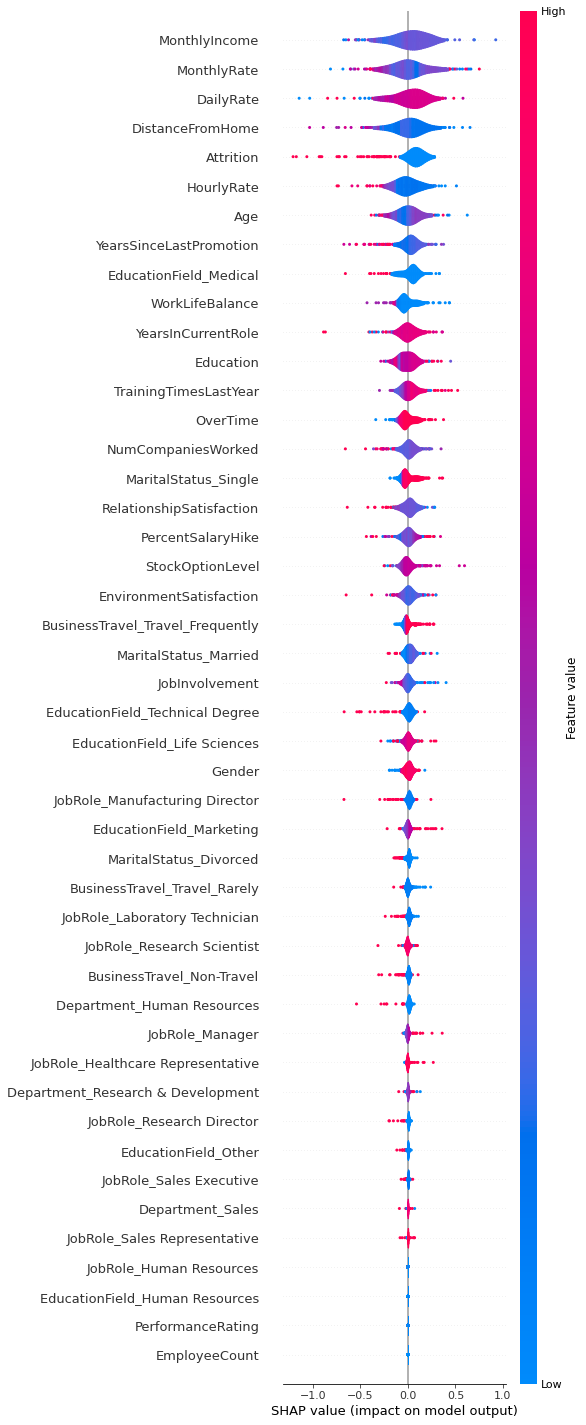

In [ ]:
features = X_test_standard.columns
explainer = shap.Explainer(gbm_not_pca.predict, X_test_standard)
shap_values = explainer(X_test_standard)
shap.summary_plot(shap_values, plot_type = 'violin',  max_display=100)

De acuerdo con el resultado anterior, las variables Age y MonthlyIncome están dentro del top 10 de las variables mas influyentes en el modelo. De hecho la variable más influyente es MonthlyIncome.

Asimismo, las tres features más importantes son:
* MonthlyIncome: Esta variable influye en todas las clases en mayor medida con una magnitud baja.
* MonthlyRate: De acuerdo con el gráfico no se observa un patrón en la parte positiva o negativa, pero se obseva un impacto postivio para valores pequeños.
* DailyRate: El impacto de esta variable es positivo para valores altos y  negativo para valores bajos.



Para identificar a mayor detalle el impacto de las variables Age y MonthlyIncome se analizarán las 4 clases.

Clase 1

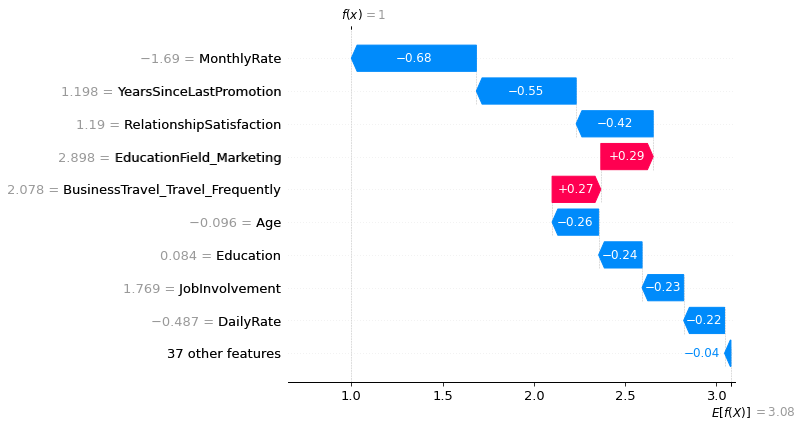

In [ ]:
shap.plots.waterfall(shap_values[4])

De acuerdo con el resultado anterior, para la instancia 4, las variables que mas influyen en la toma de decisión es MonthlyRate, YearsSinceLastPromotion, ReltionshipSatisfaction, En menor medida Age de manera negativa y MonthlyIncome no es significativa.

Clase 2

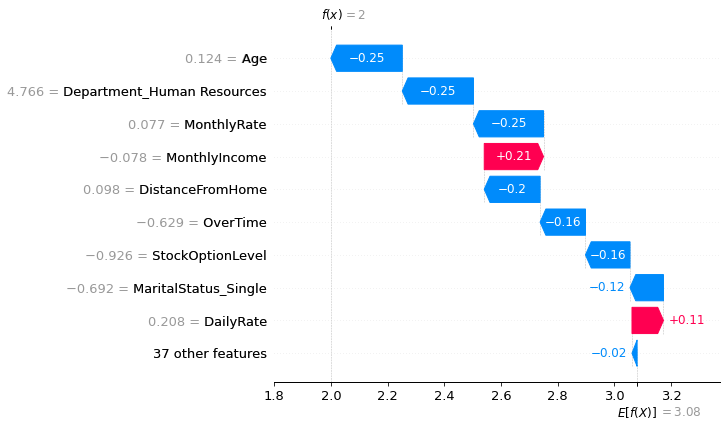

In [ ]:
shap.plots.waterfall(shap_values[25])

De acuerdo con el resultado anterior, para la instancia 25, las variables que mas influyen en la toma de decisión es Age (de manera negativa), Department y MonthlyRate Y MonthlyIncome (de manera positiva).

Clase 3

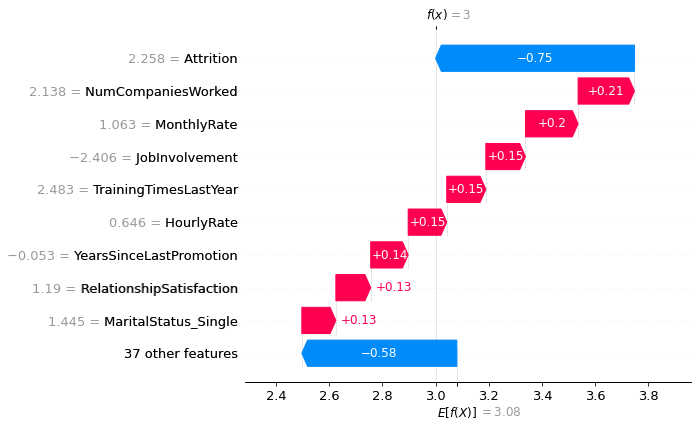

In [ ]:
shap.plots.waterfall(shap_values[5])

De acuerdo con el resultado anterior, para la instancia 5, las variables que mas influyen en la toma de decisión es Attrition, NumCompaniesWorked, MonthlyRate y JobInvolvment. En cambio las variables Age y MonthlyIncome son menos significativas.

Clase 4

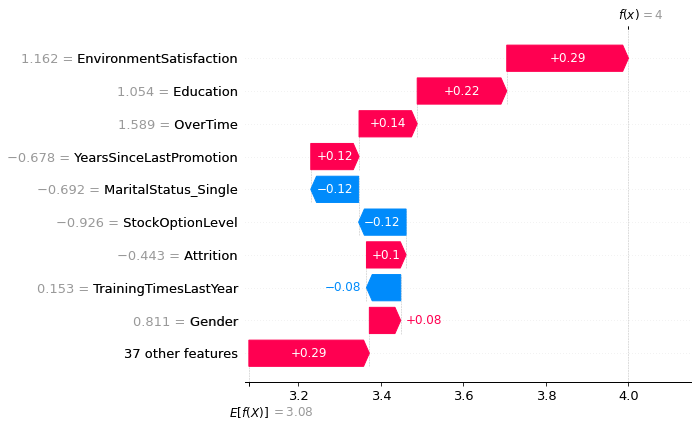

In [ ]:
shap.plots.waterfall(shap_values[1])

De acuerdo con el resultado anterior, para la instancia 1, las variables que mas influyen en la toma de decisión es EnvironmentSatisfaction, Education y OverTime. En cambio las variables Age y MonthlyIncome son menos significativas.

## Evaluación 

In [230]:
loaded_model = joblib.load('/content/xgboost_best_model.pkl')
predictions = loaded_model.predict(X_test_standard_pca)
print(classification_report(Y_test_standard, predictions))

              precision    recall  f1-score   support

         1.0       0.16      0.07      0.10        67
         2.0       0.26      0.17      0.20        54
         3.0       0.25      0.29      0.27        86
         4.0       0.28      0.40      0.33        92

    accuracy                           0.25       299
   macro avg       0.24      0.23      0.23       299
weighted avg       0.24      0.25      0.24       299



**¿Qué métrica utilizó para escoger el mejor modelo? ¿Por qué?**


La métrica utilizada fue el promedio del F1-score de todas las clases,  porque pondera la presición y el recall en un solo valor y nos permite identificar si el modelo clasifica correctamente tanto aciertos y desaciertos de cada clase.

**Adicional a las métricas de evaluación, ¿por qué lo considera un buen modelo?**

Este modelo, en comparación con los otros, presenta la menor cantidad de falsos negativos y falsos positivos. De los modelos que obtuvimos, fue el que mejor comportamiento presentaba para las clases 1 y 2, las cuales consideramos que son las más importantes para el negocio porque representan una baja satisfacción por parte del empleado y, por ende, los que podrían renunciar.  A continuación, se presenta la matriz de confusión del mejor modelo encontrado.

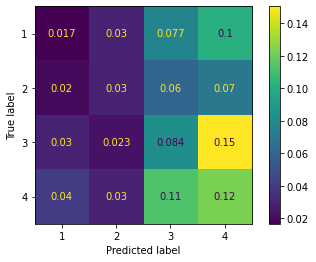

In [231]:
ConfusionMatrixDisplay.from_predictions(Y_test_standard.astype(int), predictions, normalize = 'all')

**Defina al menos 3 estrategias concretas para presentarlas al CEO de la farmacéutica que permitan mejorar el nivel de satisfacción de los empleados y evitar la fuga de personal.**

1. La primera estrategia, y la más importante, es incrementar el salario mensual de los empleados para aumentar su satisfacción laboral. Ya que de los resultados obtenidos esta variable es la que más peso aporta para la variable objetivo.
2. Según la interpretación hecha, otra de las variables que más influye en el modelo es la distancia entre el trabajo y el hogar del empleado. Por lo que, otra de las estrategias que puede implementar la farmacéutica es crear programas de rutas para minimizar el tiempo de desplazamiento de los empleados desde sus hogares al trabajo y así maximizar la satisfacción laboral de estos.
3. La última estrategia que se propone, se basa en la variable YearsSinceLastPromotion y es implementar un programa de carrera profesional a nivel interno de la farmacéutica. En este programa, cada empleado expone sus aspiraciones a promoción y así ser más visible al momento de que haya una vacante nueva. Ser reconocido fácilmente y en menos tiempo para un ascenso aumentaría la satisfacción laboral del empleado.

## Estimación del nivel de satisfacción de nuevos empleados.

In [368]:
data_val.head(15)

,JobSatisfaction,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
15,NaN,29.0,0,1389,21,4,1,2,0,51,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69,NaN,36.0,1,318,9,3,1,4,1,79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
129,NaN,49.0,0,470,20,4,1,3,0,96,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
265,NaN,29.0,0,1210,2,3,1,1,1,78,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
604,NaN,42.0,0,933,29,3,1,2,1,98,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
739,NaN,27.0,0,1055,2,4,1,1,0,47,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
844,NaN,30.0,0,852,10,3,1,3,1,72,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,NaN,42.0,0,458,26,5,1,1,0,60,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
907,NaN,44.0,0,1099,5,3,1,2,1,88,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
990,NaN,33.0,0,1111,5,1,1,2,1,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [369]:
X_val = data_val.drop('JobSatisfaction',axis=1)
X_standard_df_val = pd.DataFrame(standard_scaler.transform(X_val), columns = X_val.columns)

In [370]:
X_val_standard_pca = pca.transform(X_standard_df_val)

In [371]:
predictions = loaded_model.predict(X_val_standard_pca)

In [372]:
predictions

array([3., 3., 3., 3., 3., 3., 2., 3., 1., 3., 3., 3.])

In [376]:
data_val['JobSatisfaction_pred'] = predictions

In [377]:
data_val

,JobSatisfaction,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobSatisfaction_pred
15,NaN,29.0,0,1389,21,4,1,2,0,51,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
69,NaN,36.0,1,318,9,3,1,4,1,79,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
129,NaN,49.0,0,470,20,4,1,3,0,96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
265,NaN,29.0,0,1210,2,3,1,1,1,78,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
604,NaN,42.0,0,933,29,3,1,2,1,98,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
739,NaN,27.0,0,1055,2,4,1,1,0,47,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
844,NaN,30.0,0,852,10,3,1,3,1,72,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
887,NaN,42.0,0,458,26,5,1,1,0,60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
907,NaN,44.0,0,1099,5,3,1,2,1,88,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
990,NaN,33.0,0,1111,5,1,1,2,1,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
